In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_0mm = pd.read_csv("runJBI-0mm-cdr3-clones-Roche-JBI-IGH_HUMAN-after-reassignment.csv", sep="\t")
df_0mm["Analysis"] = "0mm"
df_0mm.head()

Sample         MID  \
0  JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12  CGTCTCTTAC   
1  JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12  CGTCTCTTAC   
2  JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12  CGTCTCTTAC   
3  JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12  CGTCTCTTAC   
4  JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12  CGTCTCTTAC   

                      cdr3pep  freq  uniq_umis     V_sub  J_sub  sum_sites  \
0        CARGPEGHEFDYWGQGTLVT    91          1   IGHV6-1  IGHJ4          0   
1   CARDYSDRTGYYAVTAYWGQGTPVT    42          1  IGHV3-20  IGHJ4          2   
2  CASQAQWDMYSVTLTVDYWGQGRLVT    35          1  IGHV4-39  IGHJ4          2   
3  CAKASVERVVVITTPFDYWGQGTLVT    31          1  IGHV3-23  IGHJ4          2   
4  CAKAQTMMVVVITTSFDYWGQGTLVT    23          1  IGHV3-23  IGHJ4          2   

   avg_sites  read_perc  umi_perc Analysis  
0   0.000000   4.337464  0.073421      0mm  
1   0.047619   2.001907  0.073421      0mm  
2   0.057143   1.668255  0.073421      0mm  
3   0.064516   1.477598  0.073421      0mm  
4   0.086957   1.096282  0.073421      0mm

In [3]:
df_1mm = pd.read_csv("runJBI-1mm-cdr3-clones-Roche-JBI-IGH_HUMAN-after-reassignment.csv", sep="\t")
df_1mm["Analysis"] = "1mm"
df_1mm.head()

Sample         MID  \
0  JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12  CGTCTCTTAC   
1  JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12  CGTCTCTTAC   
2  JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12  CGTCTCTTAC   
3  JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12  CGTCTCTTAC   
4  JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12  CGTCTCTTAC   

                      cdr3pep  freq  uniq_umis     V_sub  J_sub  sum_sites  \
0        CARGPEGHEFDYWGQGTLVT    91          1   IGHV6-1  IGHJ4          0   
1   CARDYSDRTGYYAVTAYWGQGTPVT    42          1  IGHV3-20  IGHJ4          2   
2  CASQAQWDMYSVTLTVDYWGQGRLVT    38          1  IGHV4-39  IGHJ4          3   
3  CAKASVERVVVITTPFDYWGQGTLVT    31          1  IGHV3-23  IGHJ4          2   
4  CAKAQTMMVVVITTSFDYWGQGTLVT    23          1  IGHV3-23  IGHJ4          2   

   avg_sites  read_perc  umi_perc Analysis  
0   0.000000   4.003520   0.06812      1mm  
1   0.047619   1.847778   0.06812      1mm  
2   0.078947   1.671799   0.06812      1mm  
3   0.064516   1.363836   0.06812      1mm  
4   0.086957   1.011879   0.06812      1mm

In [4]:
len(df_0mm)

1030369

In [5]:
len(df_1mm)

1083327

In [6]:
samples = list(df_0mm["Sample"].unique())
ten_samples = samples[:10]
ten_samples

['JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12',
 'JBI001-run258-region2-CGTCTCTTAC_S18',
 'JBI001-run259-JV3AIYM01-CGTCTCTTAC_S29',
 'JBI002-run252-JFBFA9N02-AGTCACTTAC_S19',
 'JBI002-run258-region2-AGTCACTTAC_S17',
 'JBI003-run242-IXKJMGP01-CTGACCTTAC_S7',
 'JBI003-run246-I4IMECA01-CTGACCTTAC_S23',
 'JBI004-run242-IXKJMGP01-TGACTCTTAC_S31',
 'JBI004-run246-I4IMECA01-TGACTCTTAC_S34',
 'JBI005-run252-JFBFA9N02-CCGAGCTTAC_S13']

## Compare samples: analysis 0mm vs 1mm

In [7]:
def makeScatter(x,y,s):
    # Determine lowest and hihest number for the x and y lim
    hec_threshold = 0.5
    the_minimum = min(min(x), min(y), hec_threshold)
    the_maximum = max(max(x), max(y), hec_threshold)
    print(s, "min max:", the_minimum, the_maximum)
    # make min a bit lower and maximum a bit higher, so you do not miss any datapoints in figure
    the_minimum = the_minimum * 0.9
    the_maximum = the_maximum * 1.1
    
    fig = plt.figure()
    ax = plt.gca()
    ax.scatter(x, y, c='blue', alpha=0.5, edgecolors='none')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([the_minimum,the_maximum])
    ax.set_ylim([the_minimum,the_maximum])
    ax.set_xlabel("read_perc, 0mm")
    ax.set_ylabel("read_perc, 1mm")
    
    # Add red dotted lines at 0.5%
    ax.plot([hec_threshold, hec_threshold], [the_minimum, the_maximum], c='r', linestyle=":")
    ax.plot([the_minimum, the_maximum], [hec_threshold, hec_threshold], c='r', linestyle=":")
    
    plt.title(s)
    fig.show()

## Using V, J, CDR3peptide as a definition for a clone

JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12 min max: 0.043994720633500004 4.33746425167


/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


JBI001-run258-region2-CGTCTCTTAC_S18 min max: 0.0328839197632 4.73833097595
JBI001-run259-JV3AIYM01-CGTCTCTTAC_S29 min max: 0.114285714286 5.23114355231
JBI002-run252-JFBFA9N02-AGTCACTTAC_S19 min max: 0.0285143997719 0.5
JBI002-run258-region2-AGTCACTTAC_S17 min max: 0.0101947191355 0.5
JBI003-run242-IXKJMGP01-CTGACCTTAC_S7 min max: 0.0241196333816 0.536809815951
JBI003-run246-I4IMECA01-CTGACCTTAC_S23 min max: 0.0331785003318 0.5967005967010001
JBI004-run242-IXKJMGP01-TGACTCTTAC_S31 min max: 0.028993911278599998 1.4075695965000001
JBI004-run246-I4IMECA01-TGACTCTTAC_S34 min max: 0.0311429461227 1.60053351117
JBI005-run252-JFBFA9N02-CCGAGCTTAC_S13 min max: 0.0270635994587 3.7561398439800002
JBI005-run258-region2-CCGAGCTTAC_S30 min max: 0.019972039145200002 2.5043177892900004
JBI005-run259-JV3AIYM01-CCGAGCTTAC_S18 min max: 0.16233766233799998 3.83275261324
JBI006-run246-I4IMECA01-CGTCTCTTAC_S19 min max: 0.0143061516452 0.5
JBI007-run246-I4IMECA01-CTGACTCCTT_S11 min max: 0.00693385106088 0.

/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


JBI013-run246-I4IMECA01-CGATCTCTTA_S26 min max: 0.016946280291500002 0.720590884525
JBI014-run252-JFBFA9N02-TGGCGCTTAC_S23 min max: 0.0251635631605 4.62863293864
JBI014-run258-region2-TGGCGCTTAC_S33 min max: 0.0179468772434 6.2416235879799995
JBI014-run259-JV3AIYM01-TGGCGCTTAC_S30 min max: 0.254452926209 6.4690026954199995
JBI015-run242-IXKJMGP01-CTTGACTTAC_S26 min max: 0.0368052999632 1.03135313531
JBI015-run246-I4IMECA01-CTTGACTTAC_S29 min max: 0.0356379187455 0.978393803506
JBI016-run242-IXKJMGP01-TGGACCTTAC_S19 min max: 0.0133457894034 1.27577510755
JBI017-run252-JFBFA9N02-AGACGCTTAC_S2 min max: 0.018119224497200003 3.2576505429400004
JBI017-run258-region1-AGACGCTTAC_S6 min max: 0.0157853196527 3.61279170268
JBI018-run246-I4IMECA02-AGTTCGTCCT_S12 min max: 0.0115207373272 13.587150505699999
JBI019-run252-JFBFA9N02-ACATGACTTA_S11 min max: 0.0228675966156 1.76948828312
JBI019-run258-region1-ACATGACTTA_S10 min max: 0.0220945647371 0.9287206872529999
JBI019-run259-JV3AIYM01-ACATGACTTA_S

JBI077-run242-IXKJMGP01-TGCGACCTTA_S10 min max: 0.0173792144595 0.514989884127
JBI077-run246-I4IMECA01-TGCGACCTTA_S15 min max: 0.0440528634361 0.5623242736640001
JBI078-run258-region1-ATAACCTTAC_S28 min max: 0.00712910814857 56.54419359600001
JBI079-run258-region1-CGTCTCTTAC_S31 min max: 0.00945715906942 1.31050517861
JBI080-run258-region1-AGTCACTTAC_S33 min max: 0.00571167466301 33.881418518800004
JBI081-run251-JDG3JVM02-AGCTCACTTA_S17 min max: 0.0165755014089 0.626903098692
JBI082-run246-I4IMECA01-ACTGACTCCT_S38 min max: 0.5 1.9801980198
JBI083-run242-IXKJMGP01-ACAACTCTTA_S25 min max: 0.0206611570248 1.35658914729
JBI083-run246-I4IMECA01-ACAACTCTTA_S31 min max: 0.0352112676056 1.54582259845
JBI084-run246-I4IMECA02-TGGCGCTTAC_S35 min max: 0.022547914317900004 2.62390670554
JBI084-run258-region1-TGGCGCTTAC_S36 min max: 0.023963575365400003 1.9807140995599997
JBI085-run246-I4IMECA01-TGGACCTTAC_S4 min max: 0.014990256333399999 1.55686660111
JBI086-run258-region1-CCGAGCTTAC_S4 min max: 0.

JBI151-run259-JV3AIYM02-TGACTCTTAC_S27 min max: 0.0163052339801 5.135898340980001
JBI152-run259-JV3AIYM02-CACTTGACCT_S14 min max: 0.0163478829492 2.8854664542400004
JBI153-run242-IXKJMGP02-AGACGCTTAC_S7 min max: 0.026420079260200003 3.3854907539099997
JBI153-run246-I4IMECA02-AGACGCTTAC_S21 min max: 0.023020257826900002 3.0961298377
JBI154-run259-JV3AIYM02-TGGACCTTAC_S12 min max: 0.012434717731899999 7.46807687347
JBI155-run242-IXKJMGP02-ACATGACTTA_S2 min max: 0.015008254540000002 5.731548007840001
JBI155-run246-I4IMECA02-ACATGACTTA_S26 min max: 0.0387296669249 3.91169635941
JBI156-run259-JV3AIYM02-ACACTCTTAC_S20 min max: 0.015525539512499999 1.4427860696500001
JBI157-run259-JV3AIYM02-TCGGACTTAC_S3 min max: 0.0156494522692 9.658809955499999
JBI158-run252-JFBFA9N02-ATAACCTTAC_S7 min max: 0.0109277674571 44.447031431899994
JBI158-run258-region2-ATAACCTTAC_S34 min max: 0.0157306905773 41.0343654304
JBI159-run242-IXKJMGP02-CTCGACCTTA_S35 min max: 0.0666222518321 8.3931133429
JBI159-run246-I

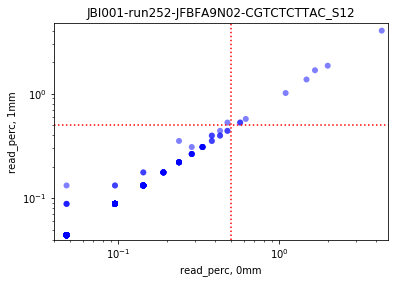

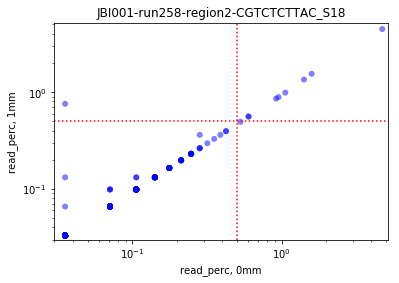

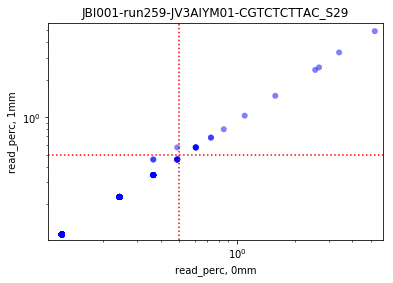

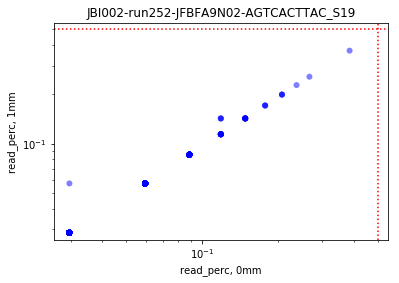

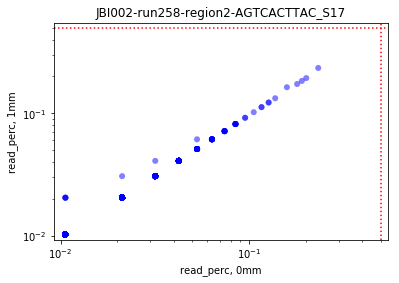

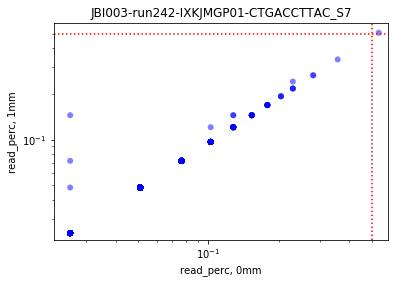

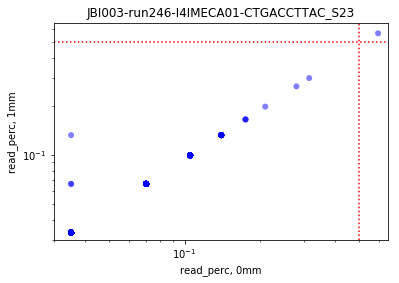

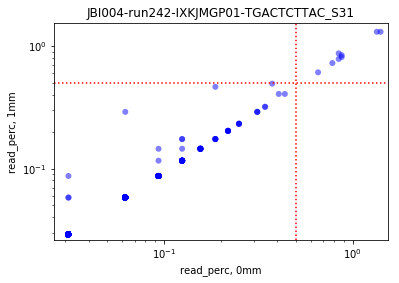

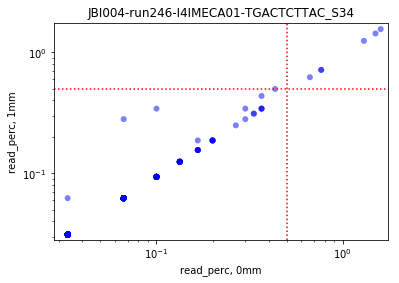

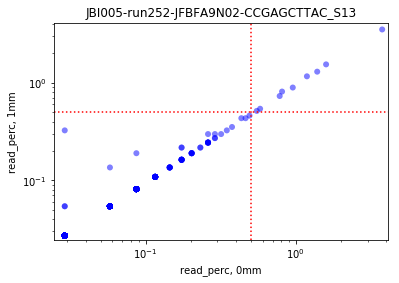

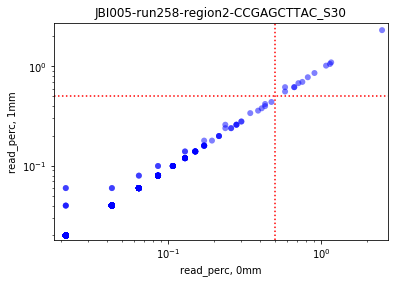

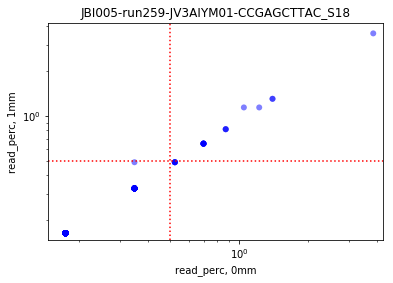

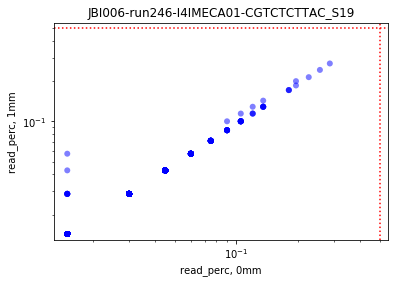

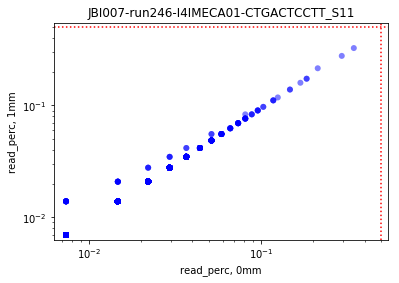

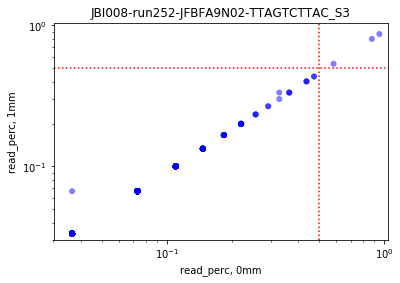

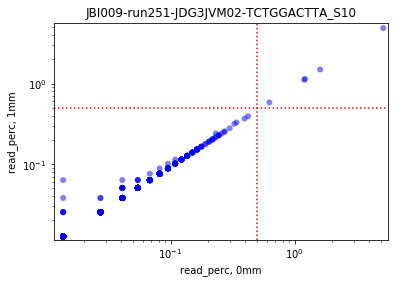

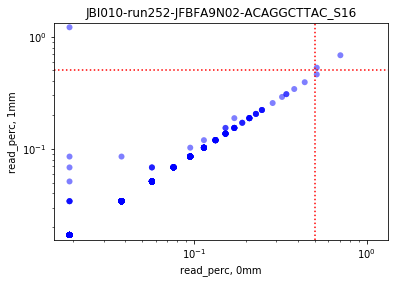

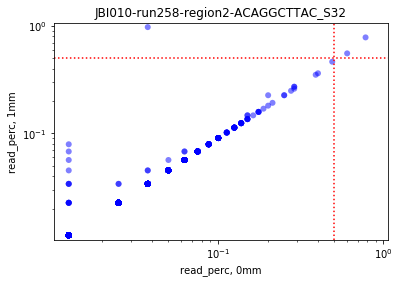

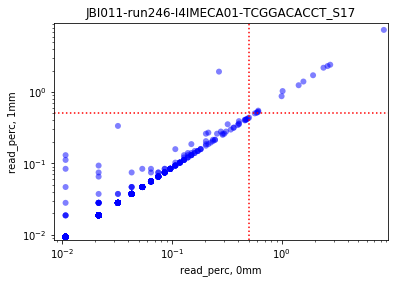

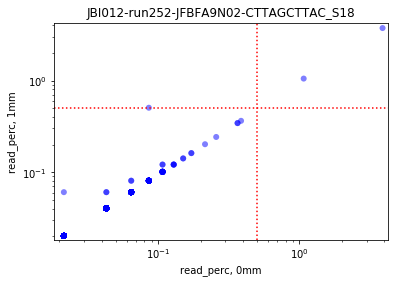

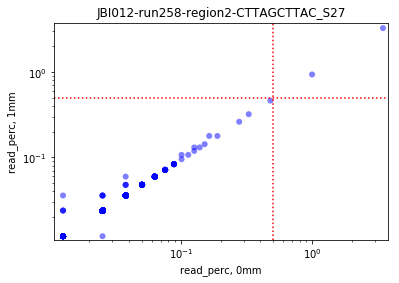

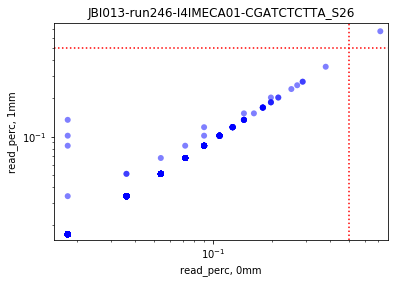

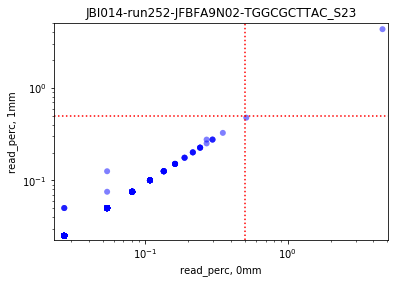

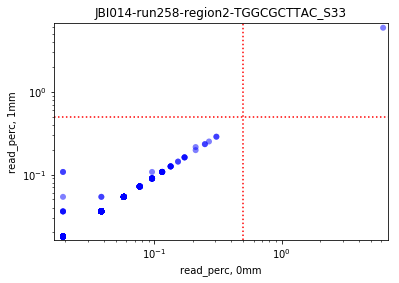

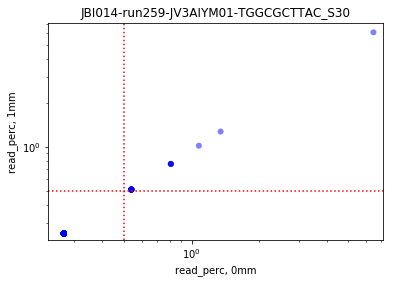

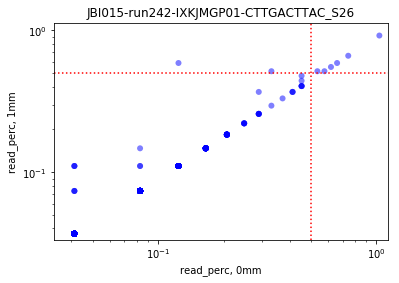

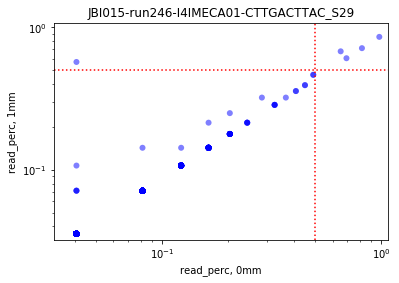

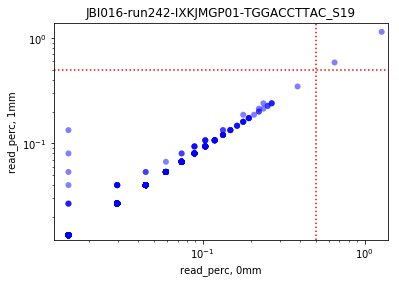

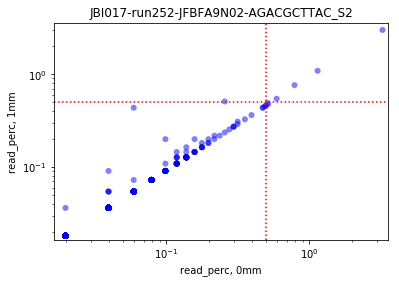

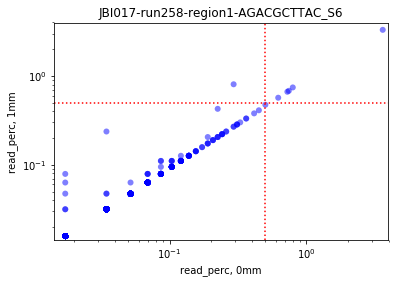

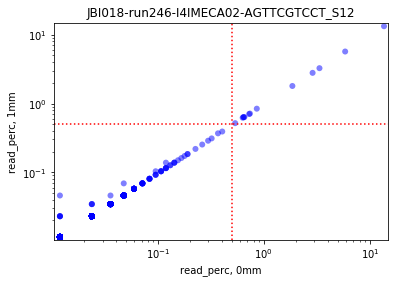

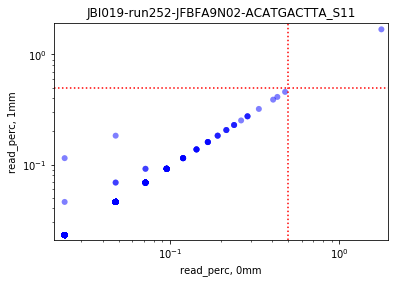

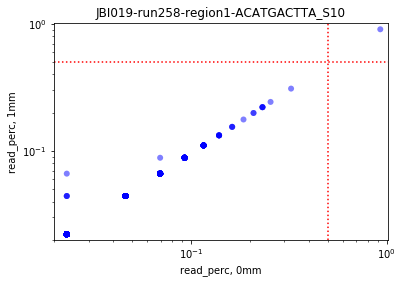

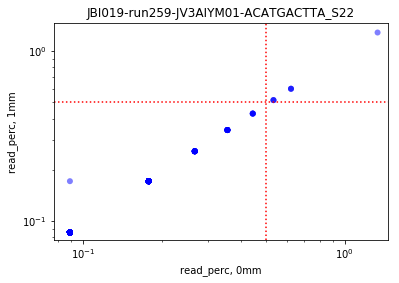

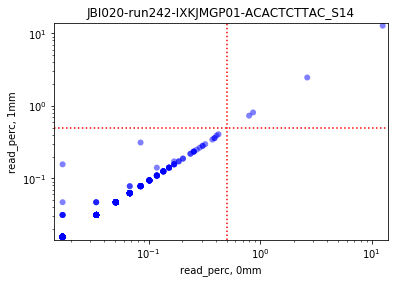

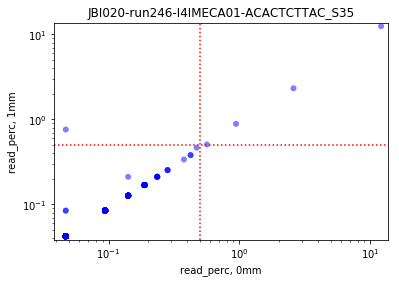

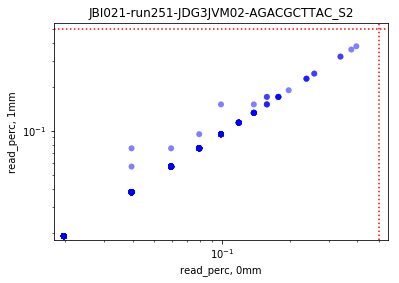

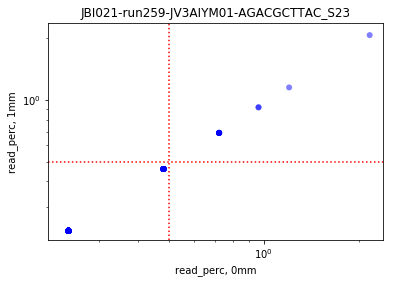

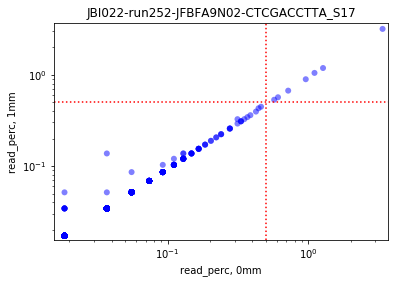

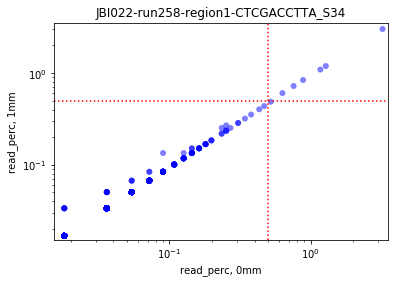

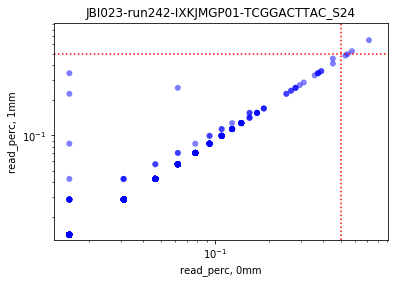

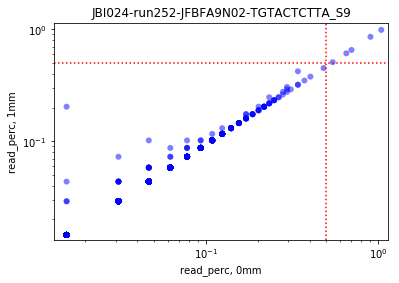

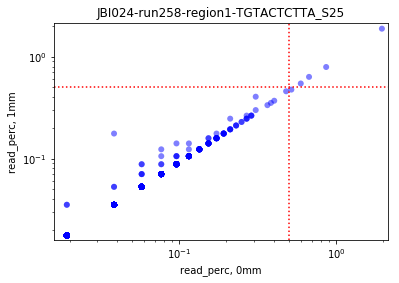

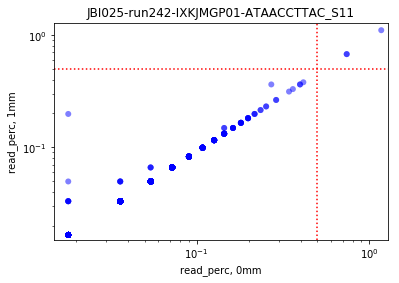

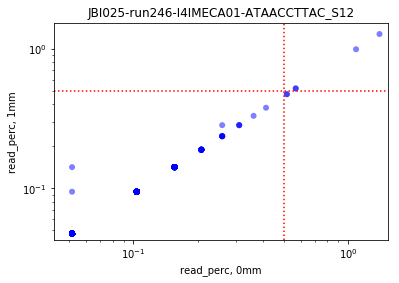

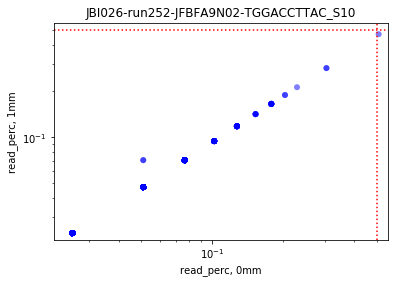

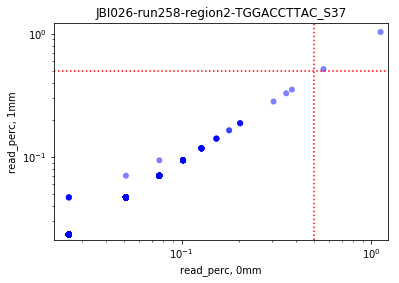

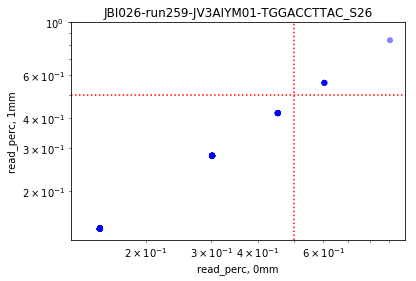

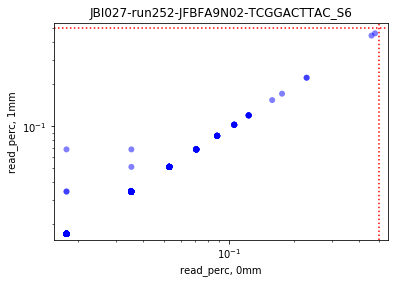

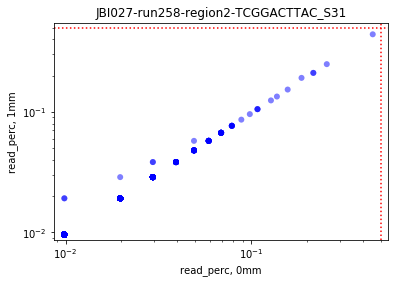

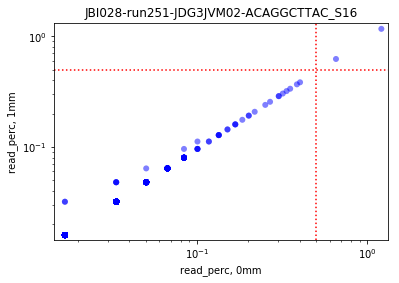

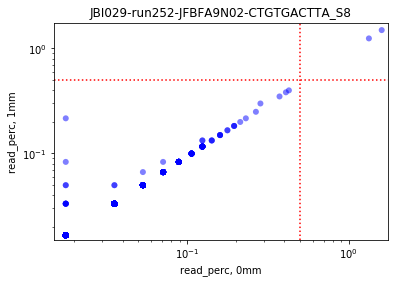

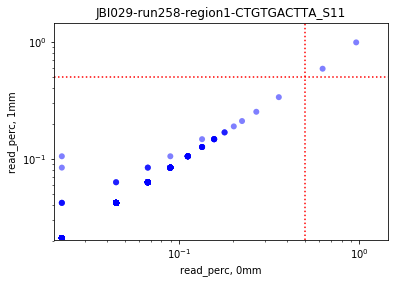

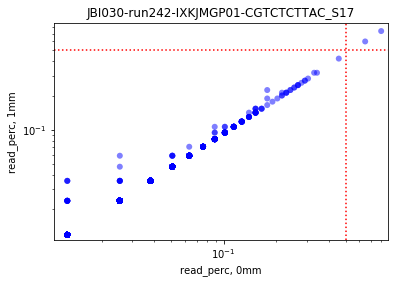

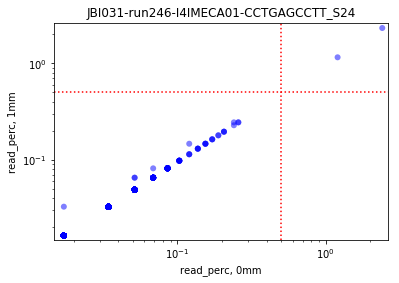

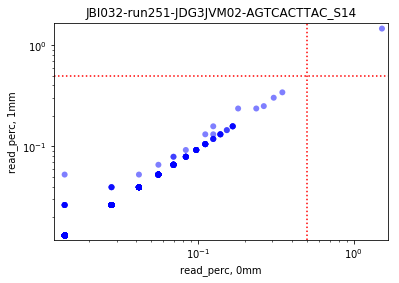

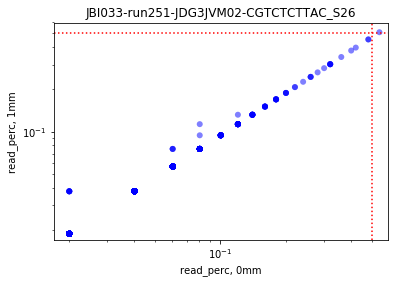

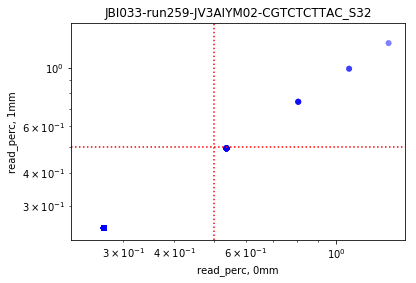

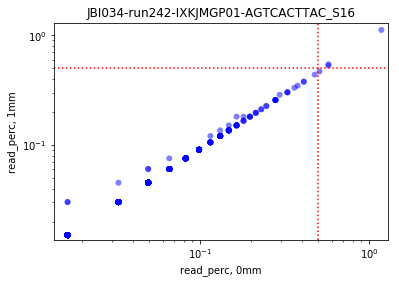

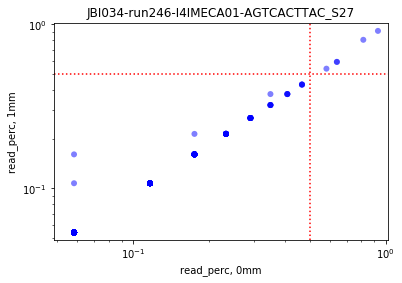

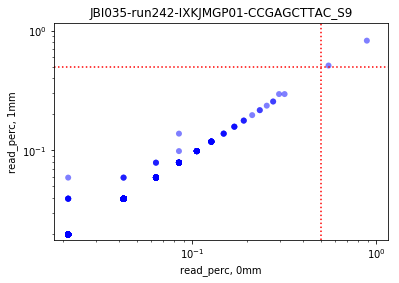

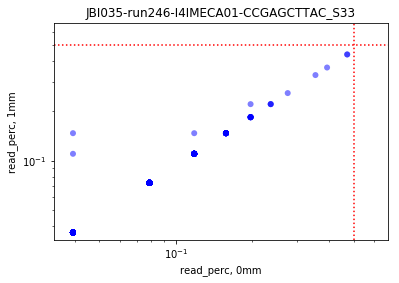

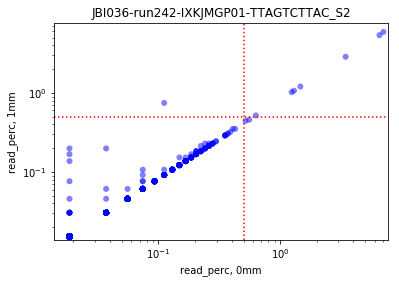

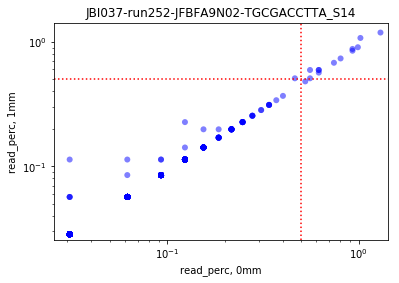

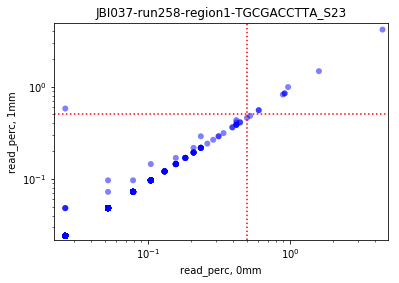

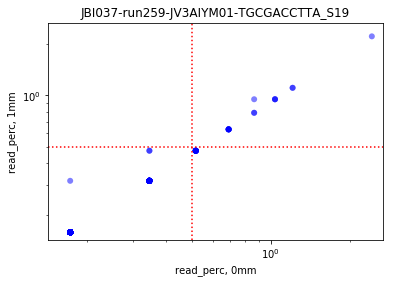

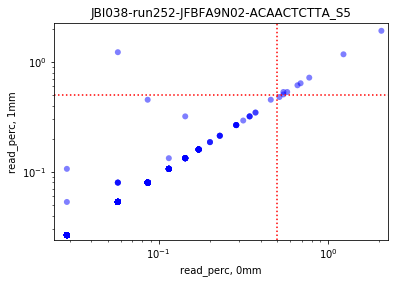

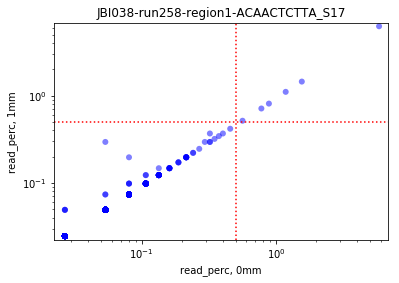

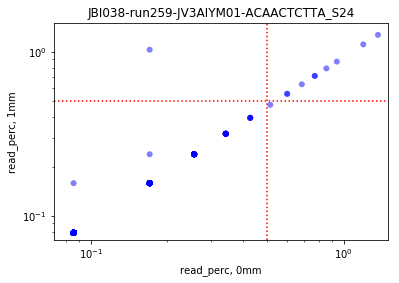

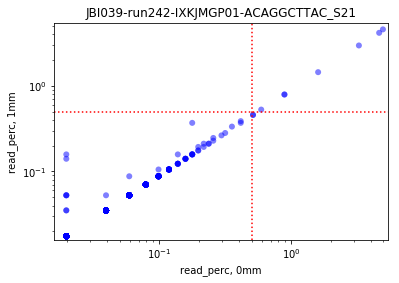

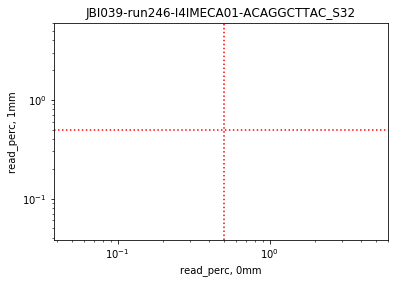

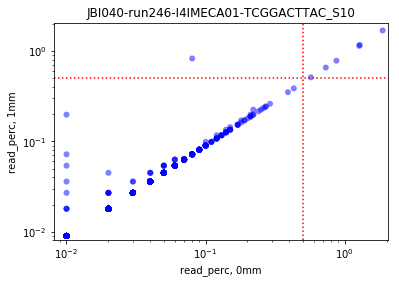

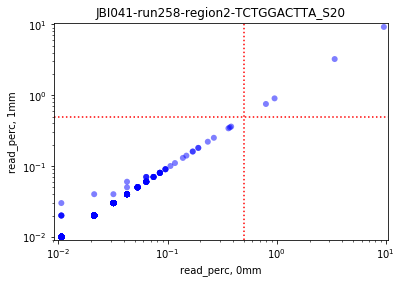

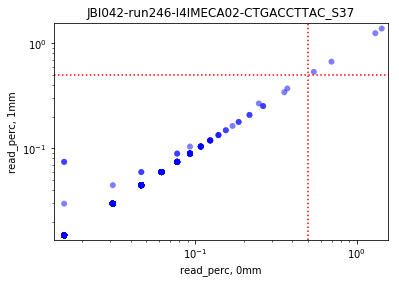

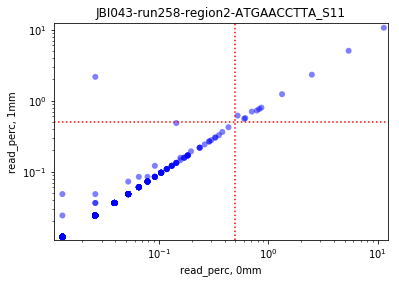

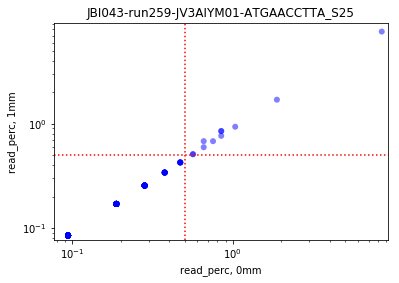

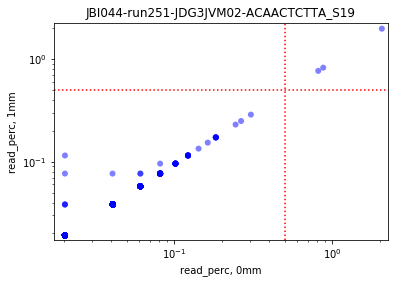

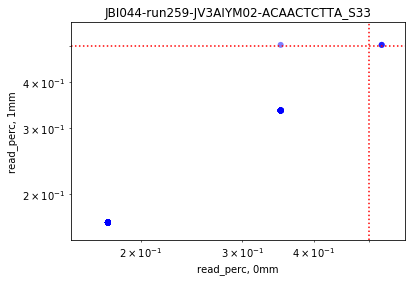

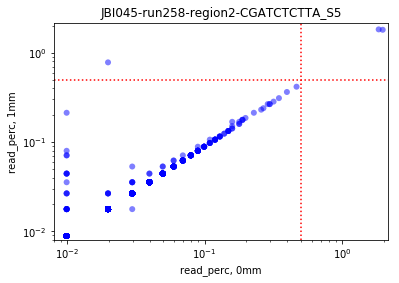

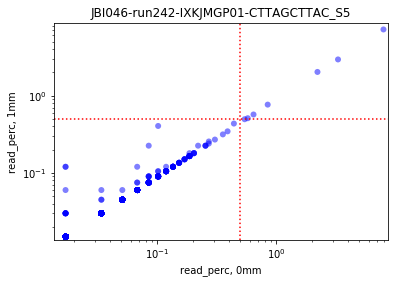

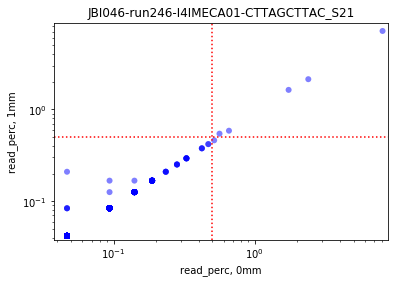

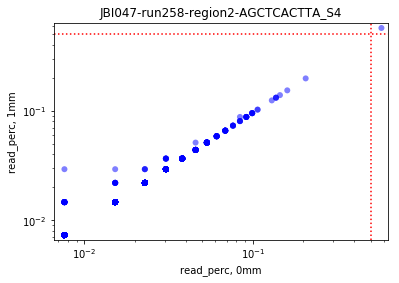

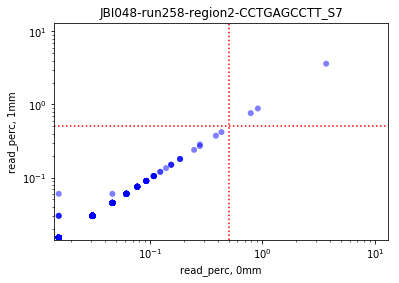

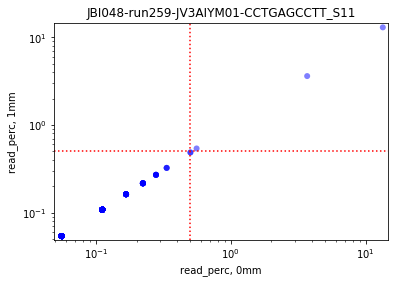

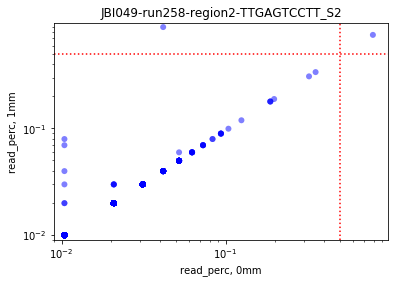

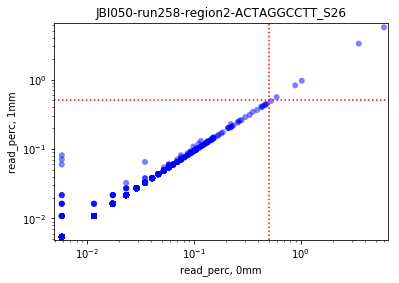

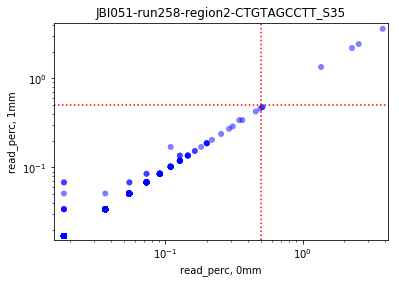

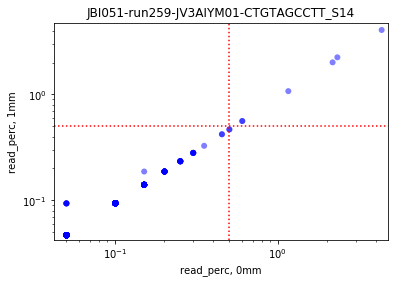

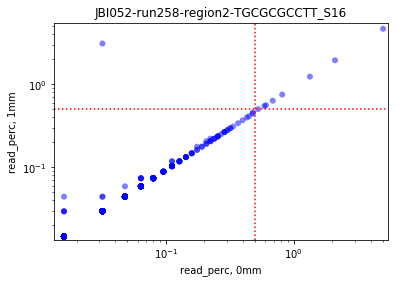

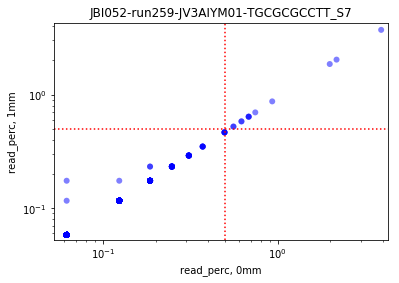

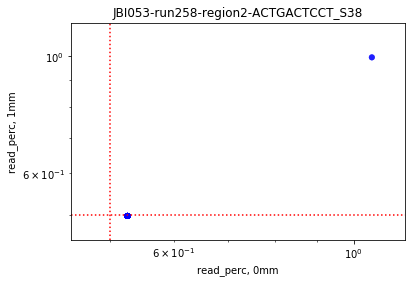

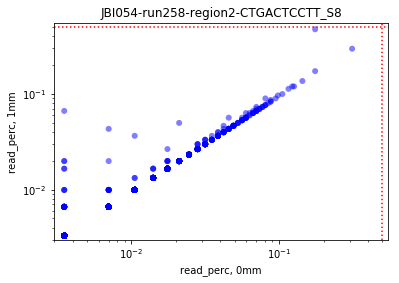

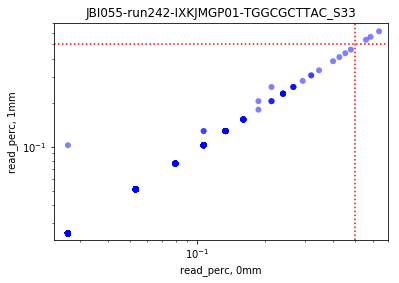

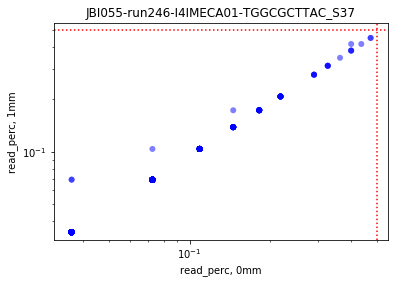

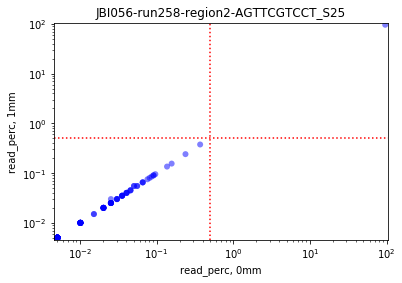

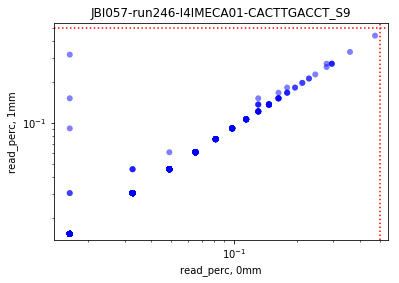

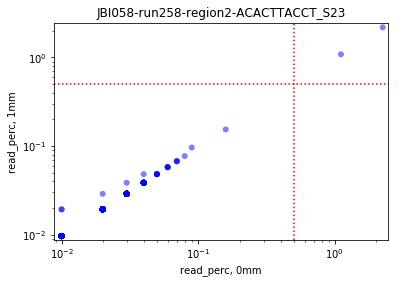

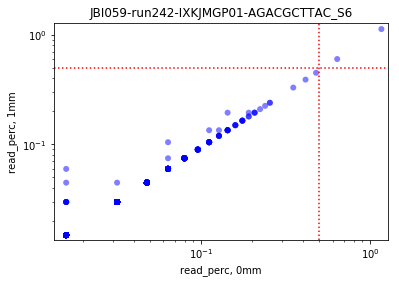

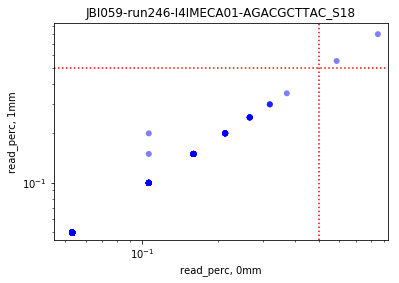

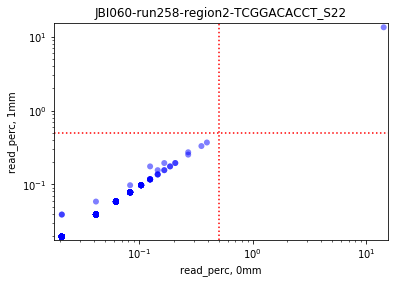

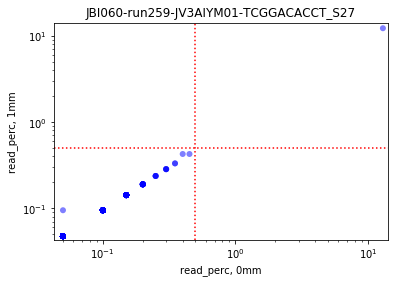

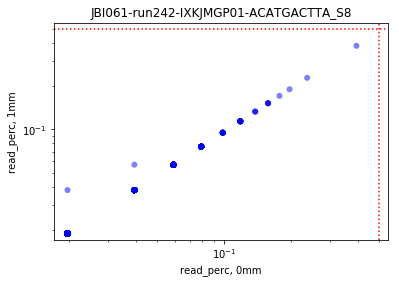

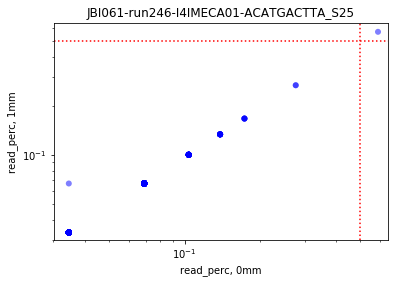

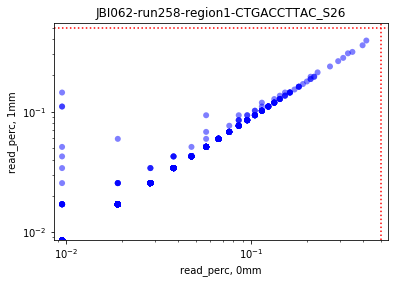

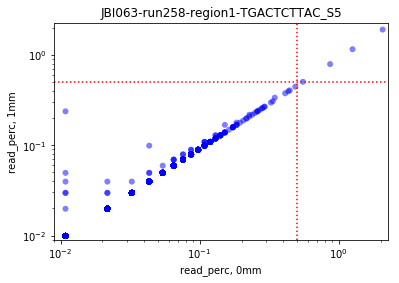

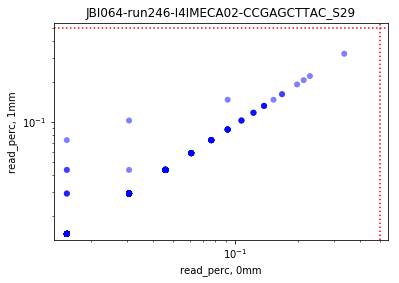

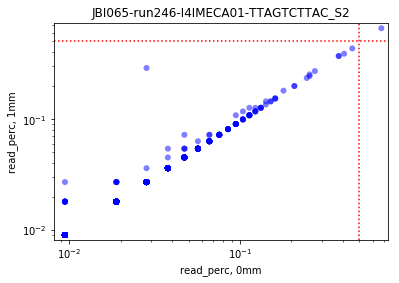

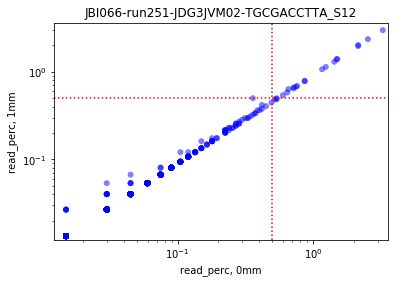

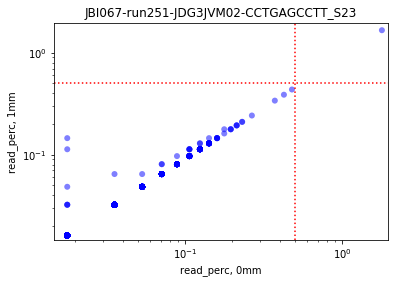

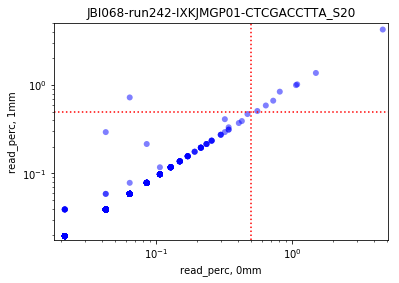

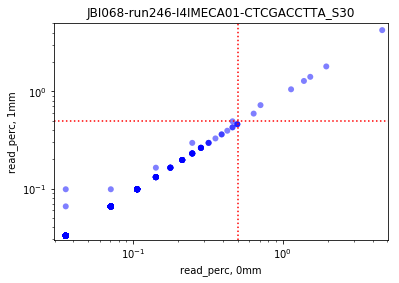

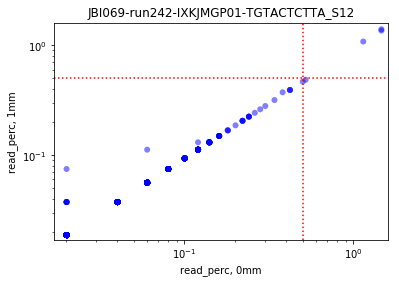

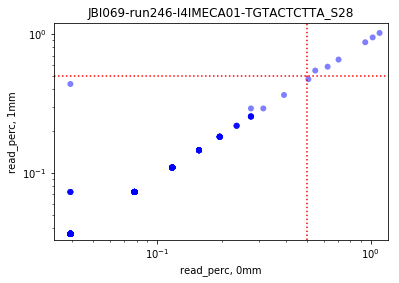

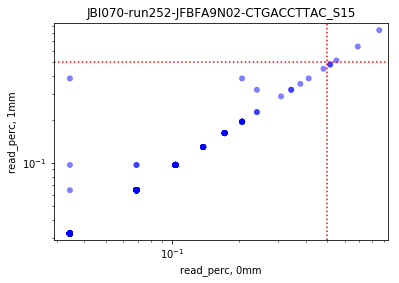

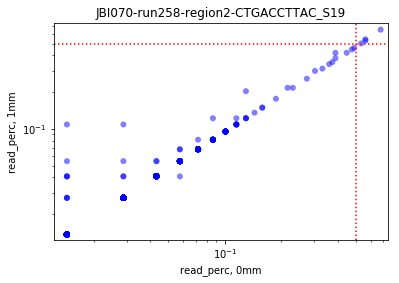

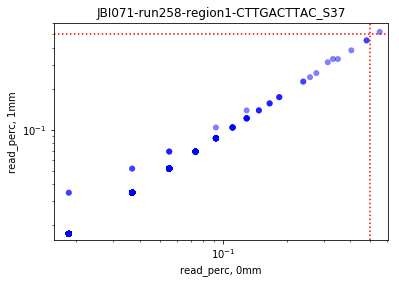

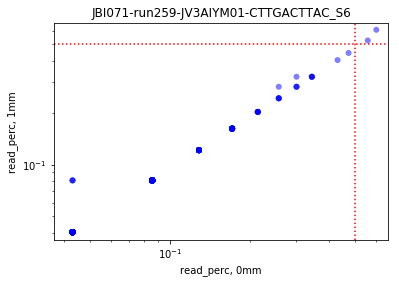

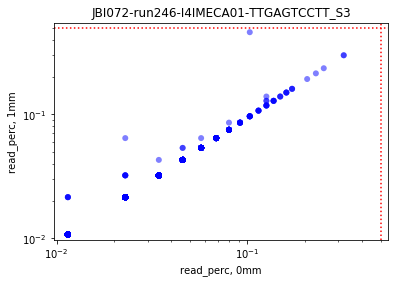

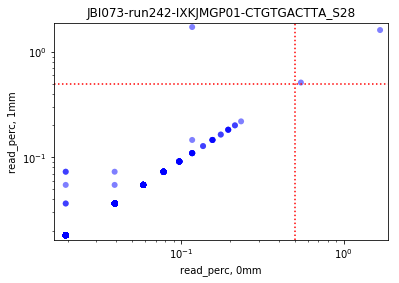

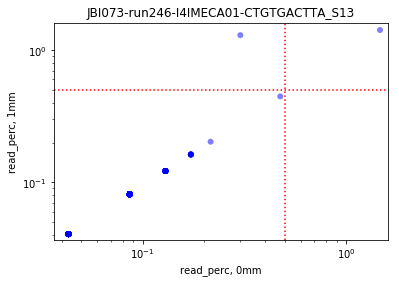

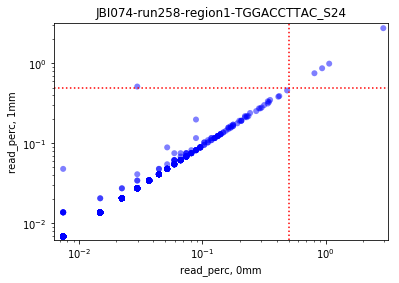

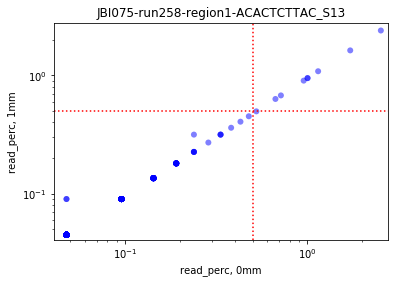

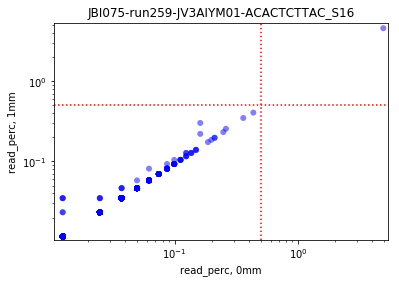

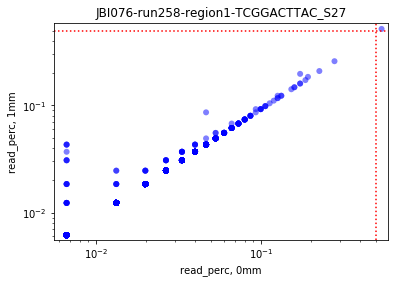

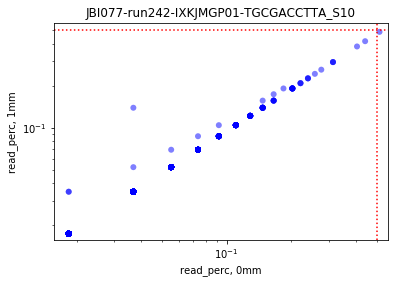

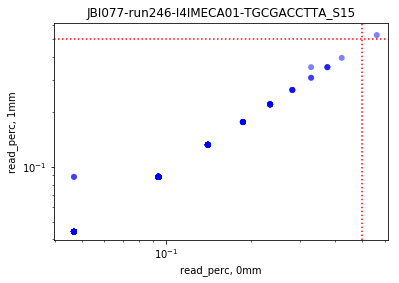

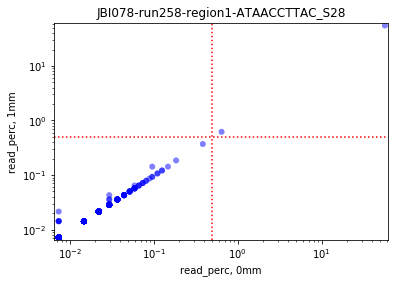

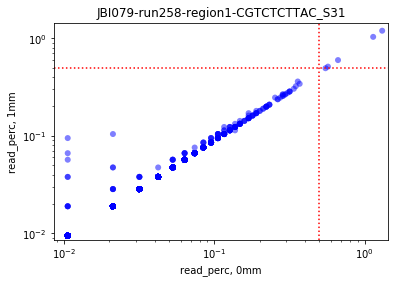

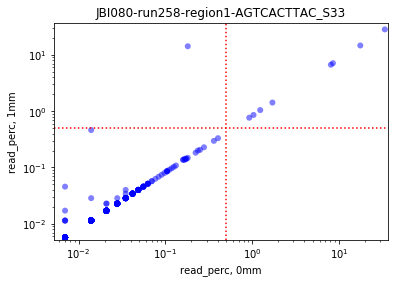

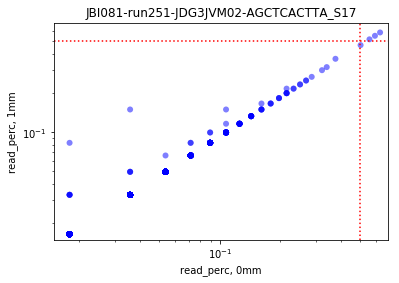

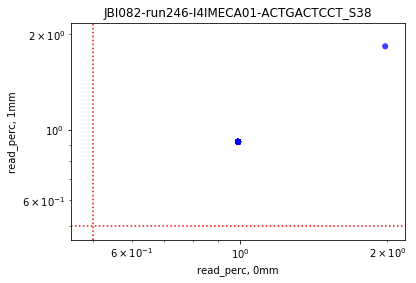

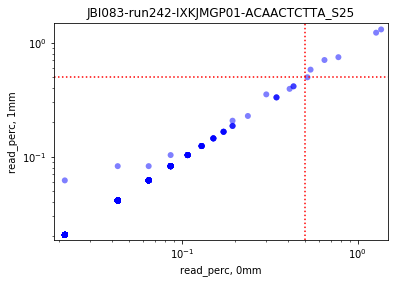

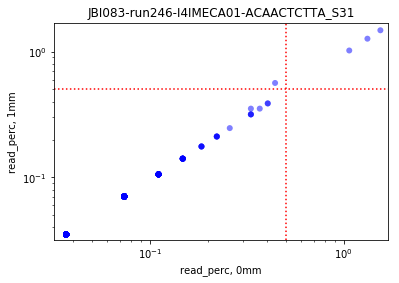

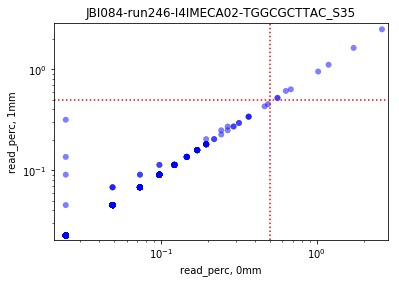

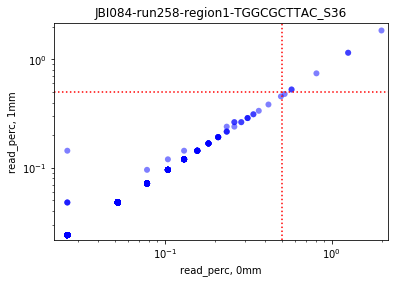

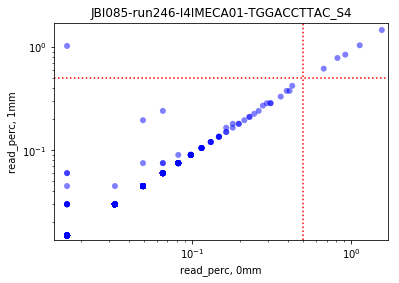

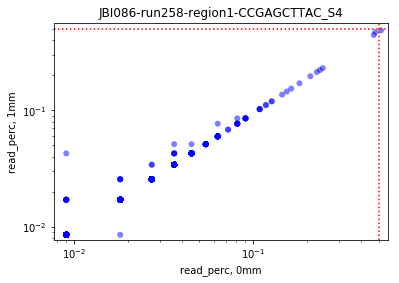

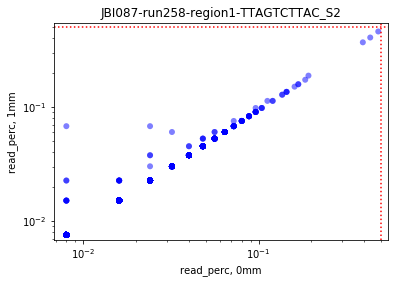

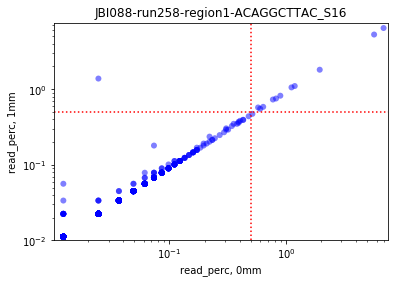

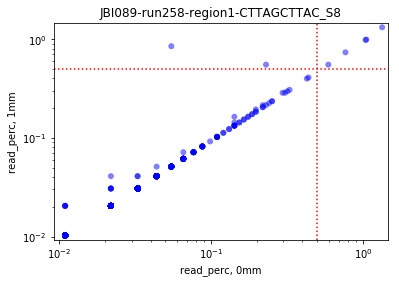

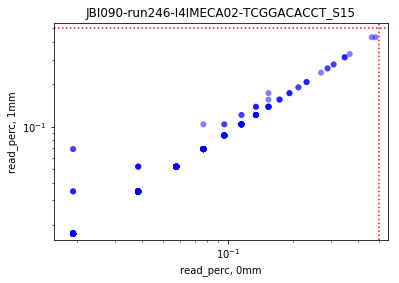

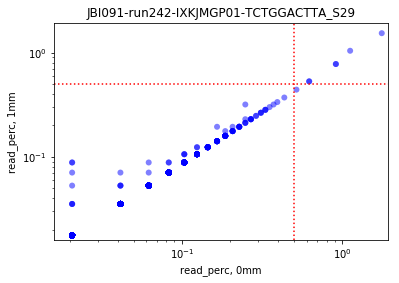

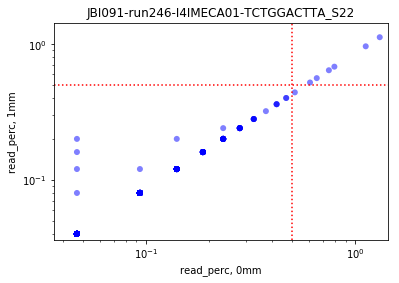

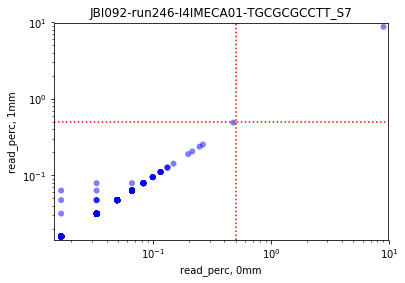

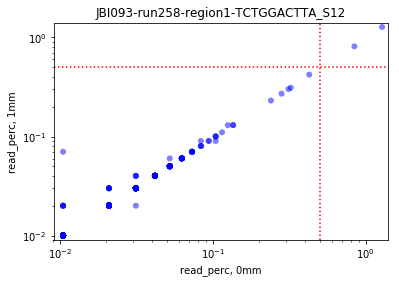

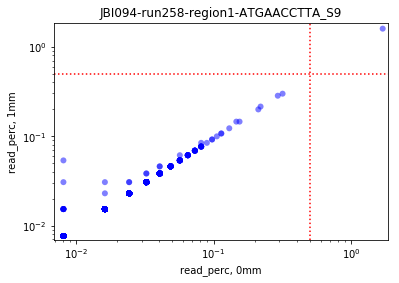

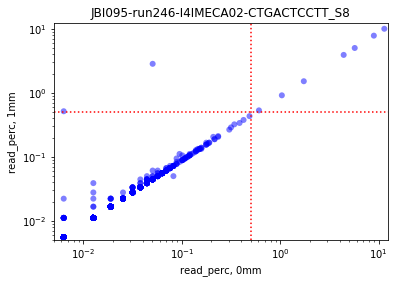

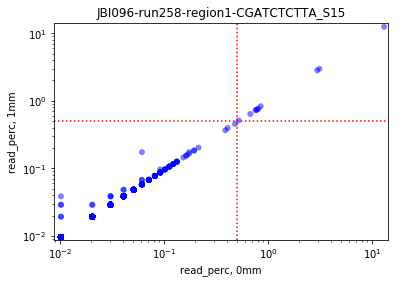

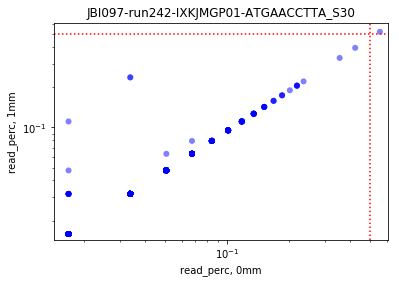

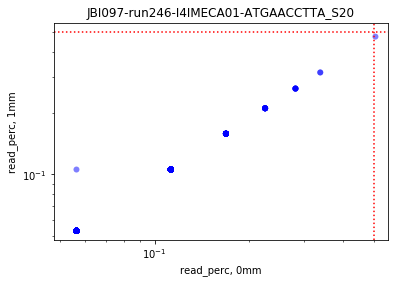

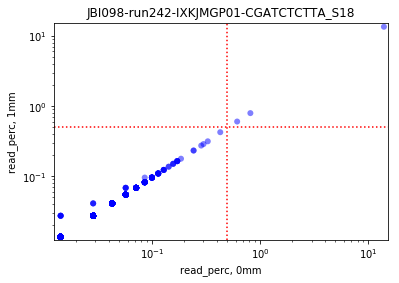

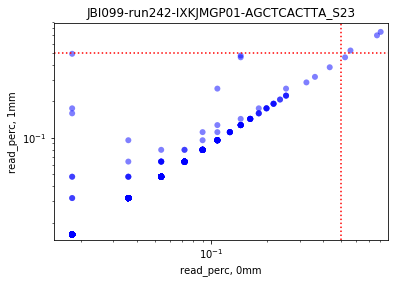

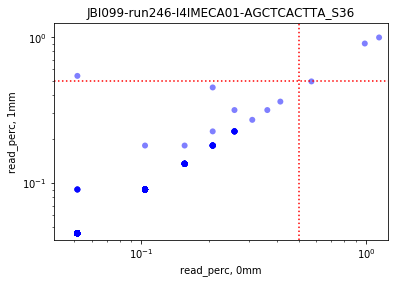

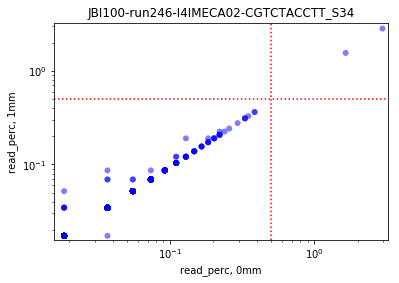

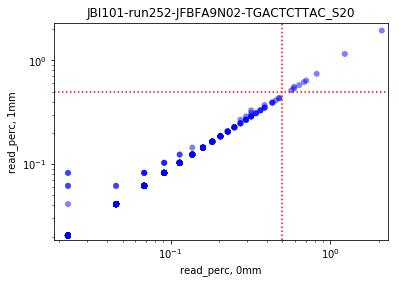

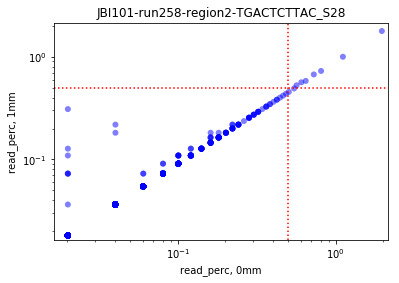

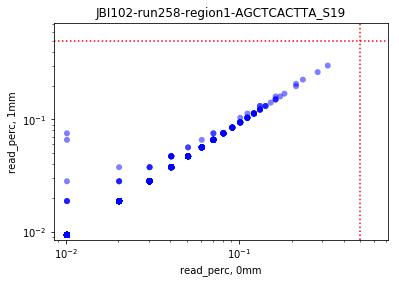

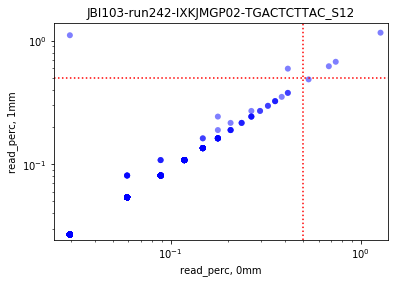

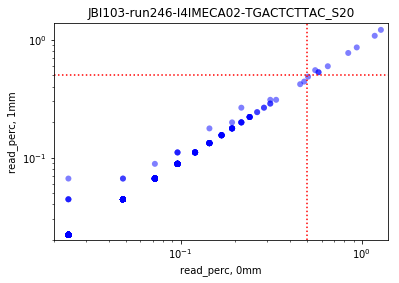

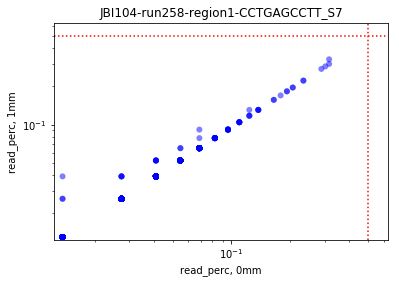

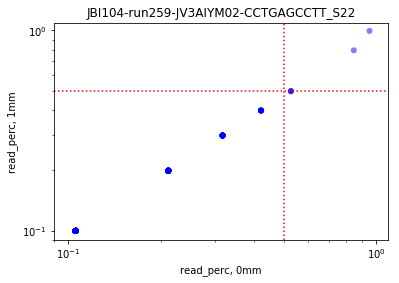

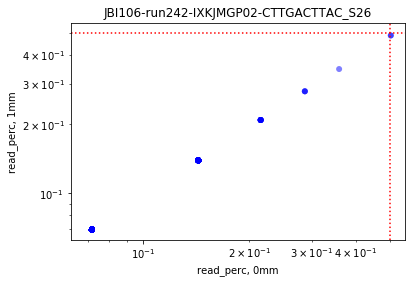

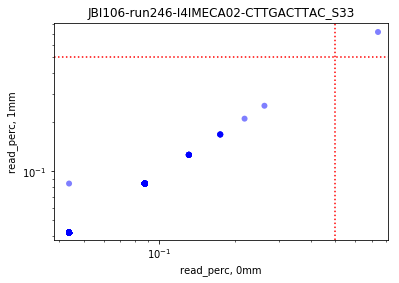

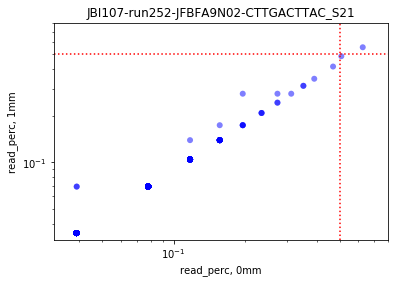

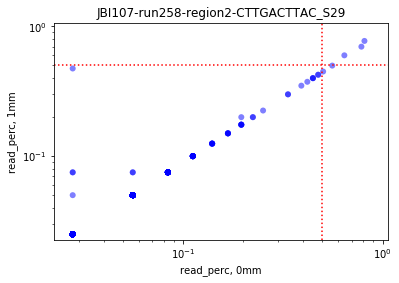

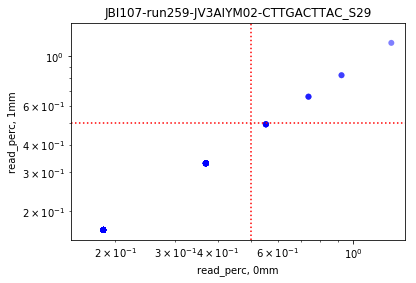

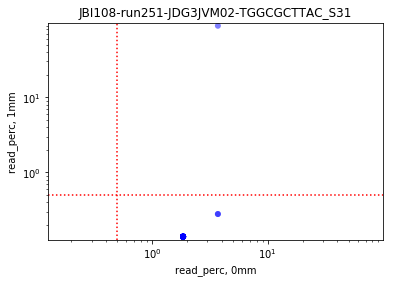

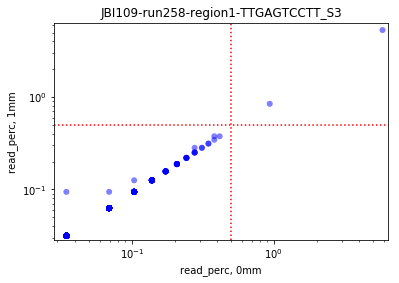

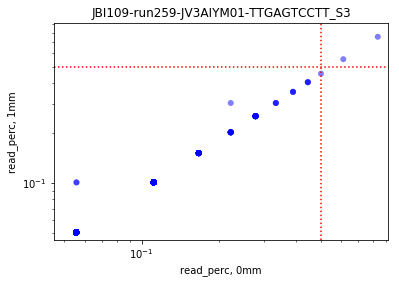

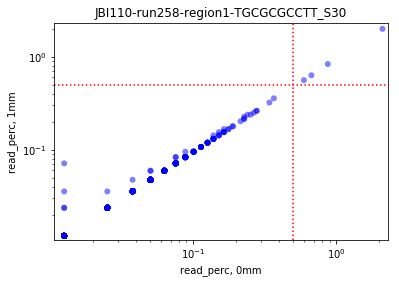

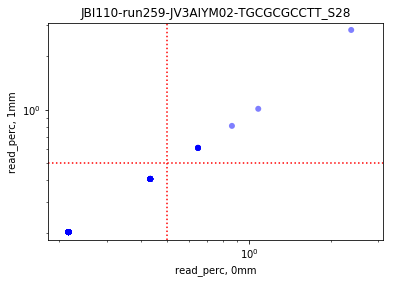

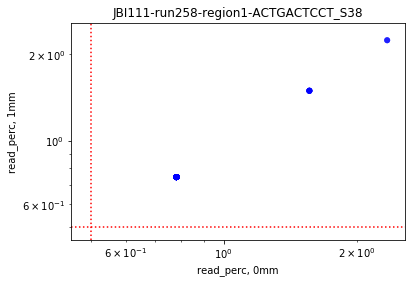

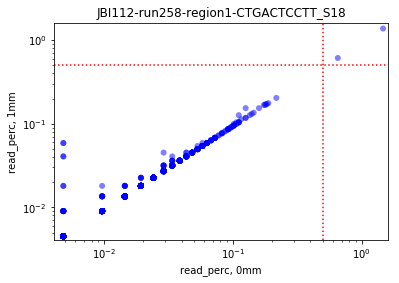

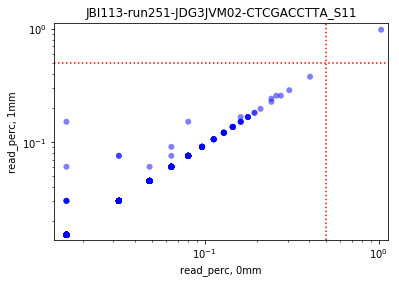

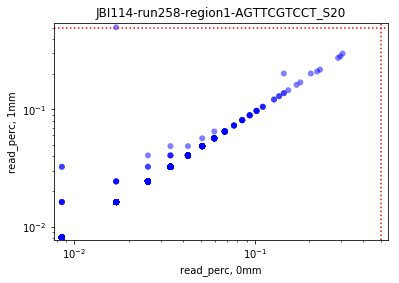

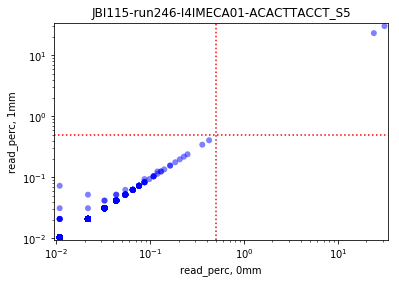

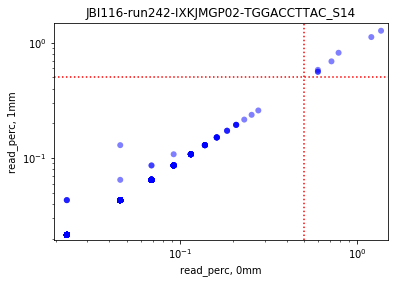

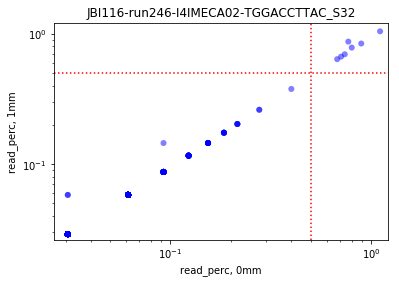

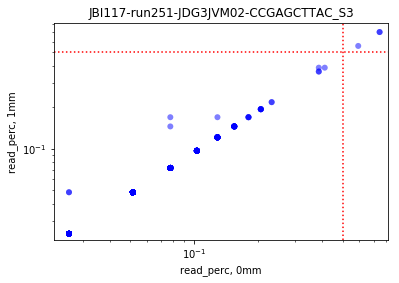

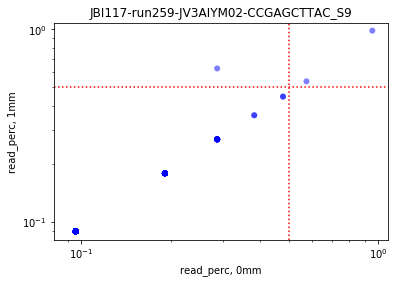

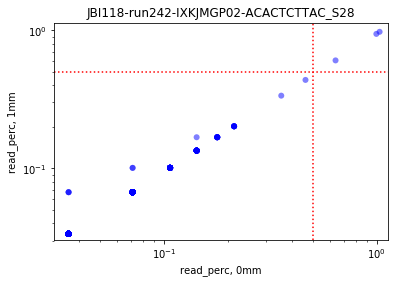

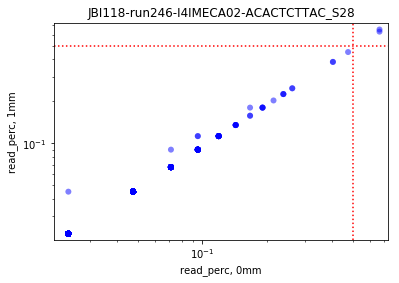

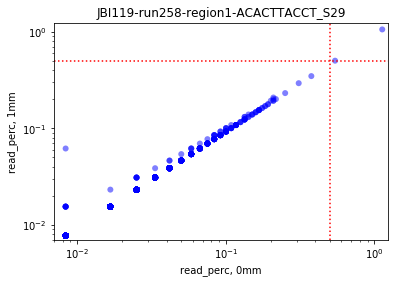

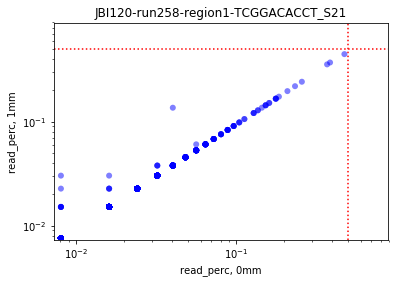

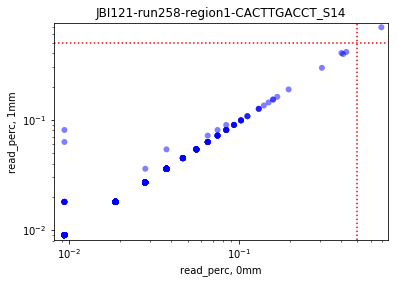

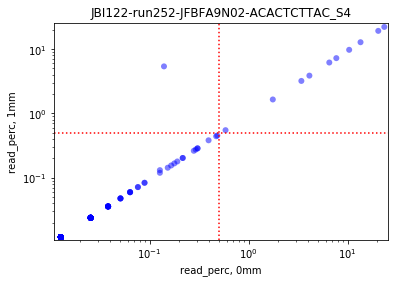

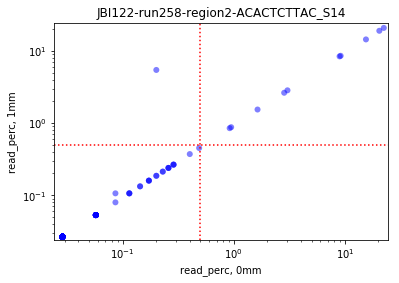

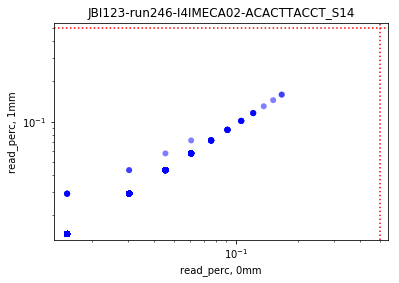

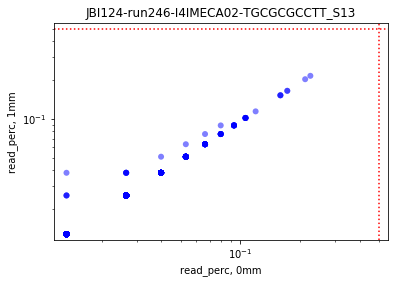

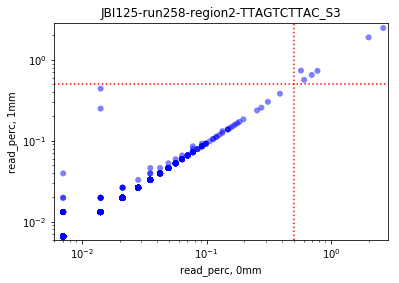

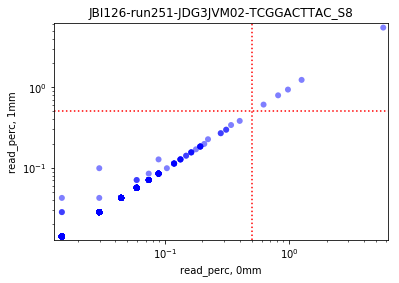

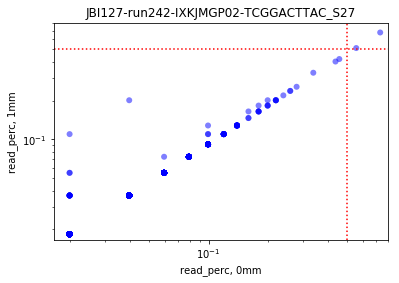

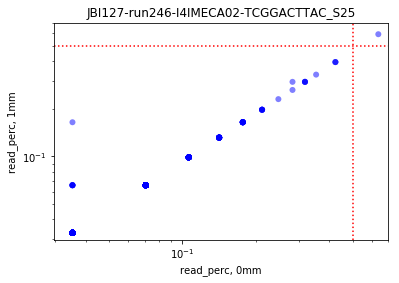

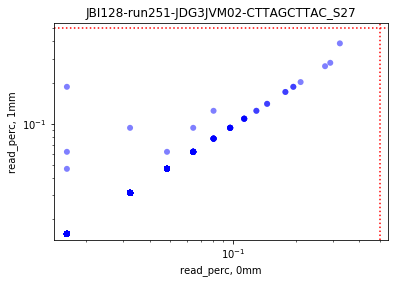

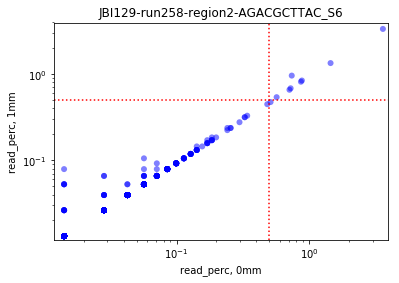

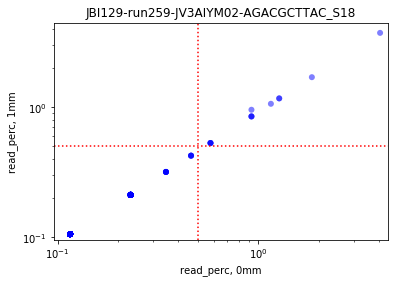

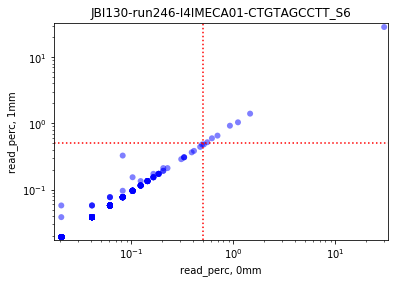

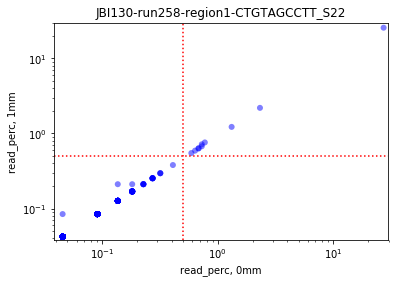

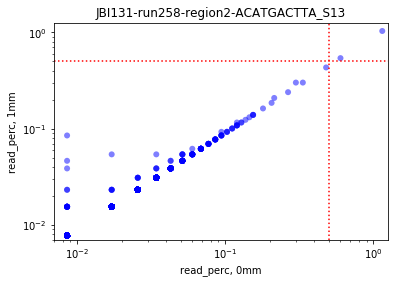

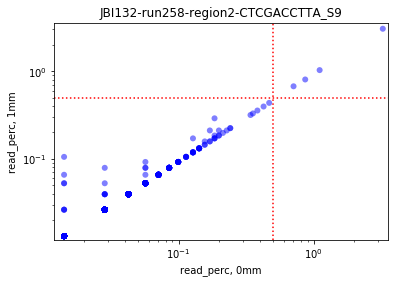

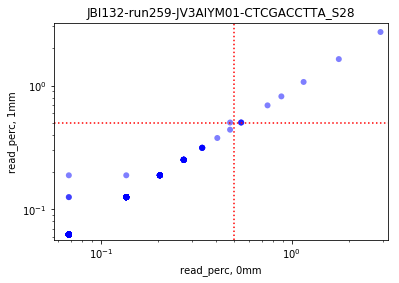

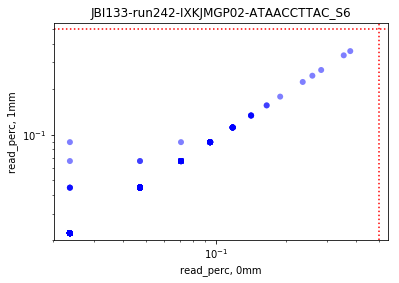

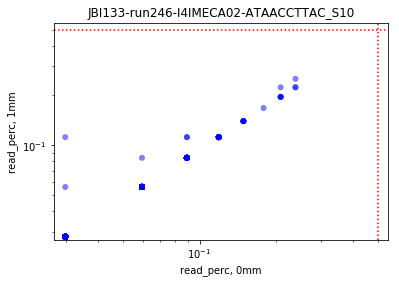

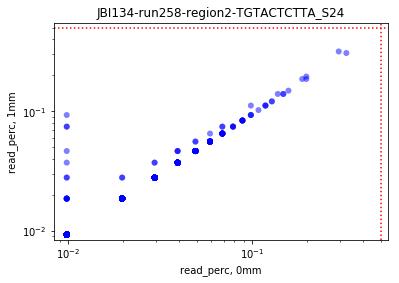

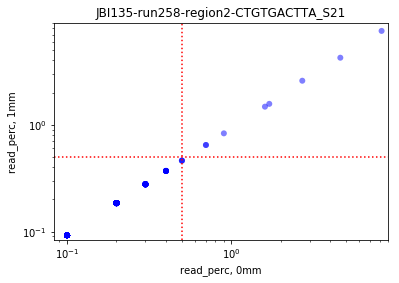

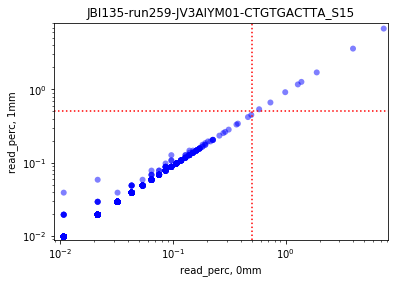

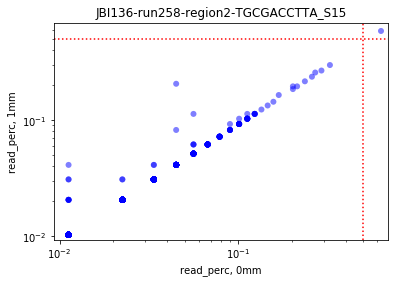

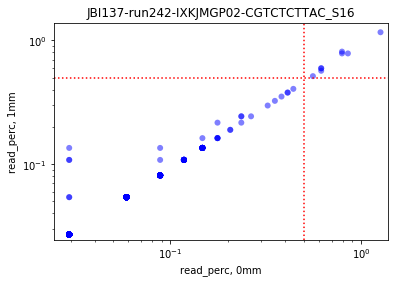

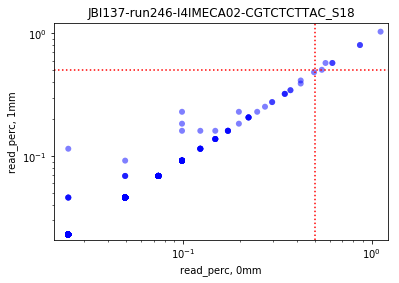

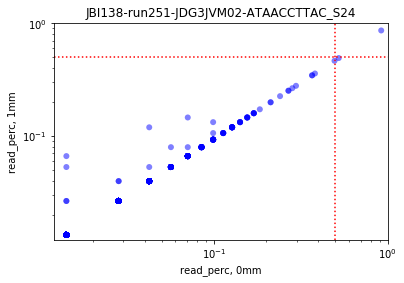

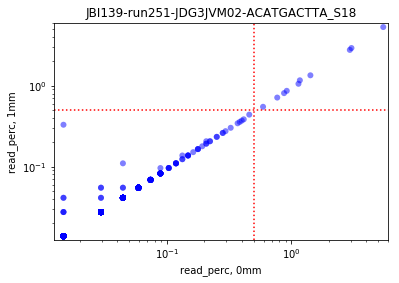

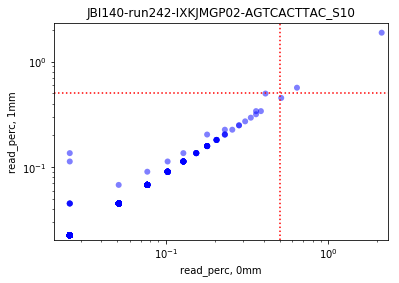

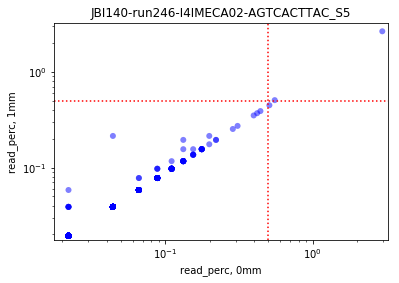

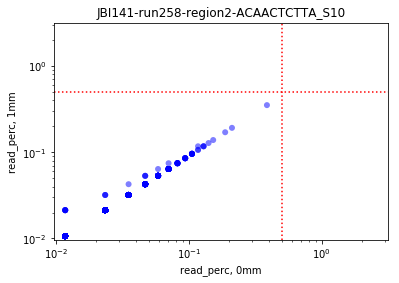

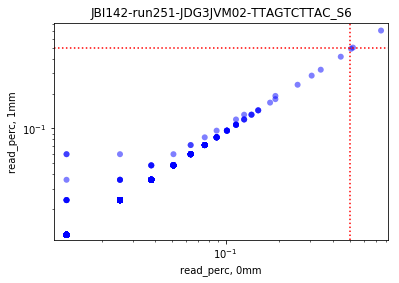

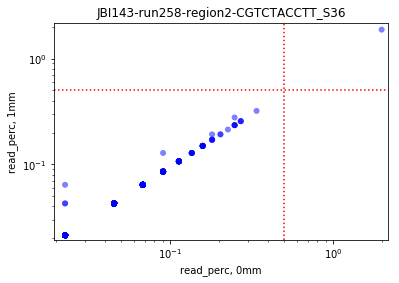

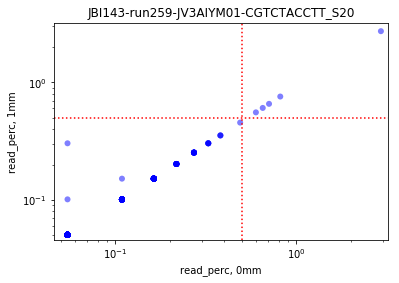

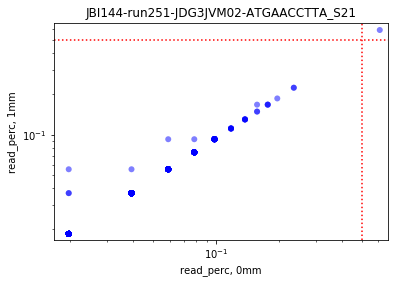

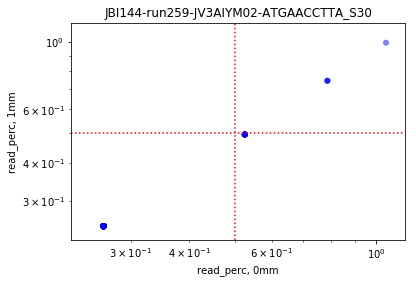

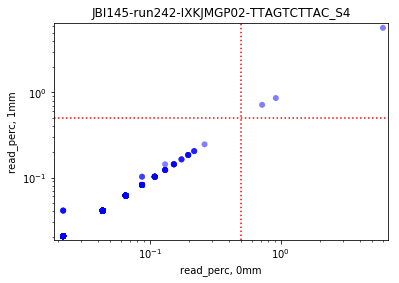

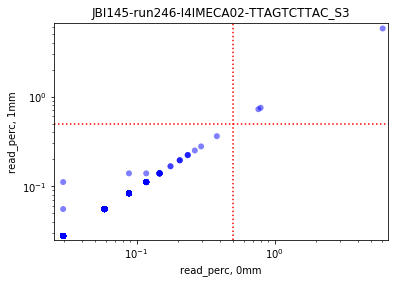

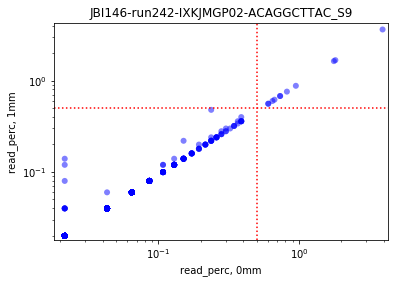

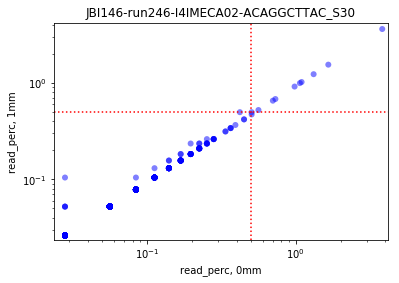

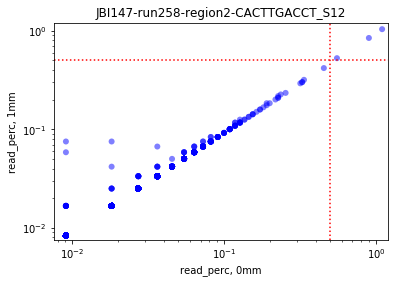

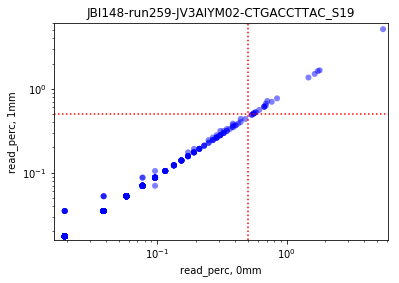

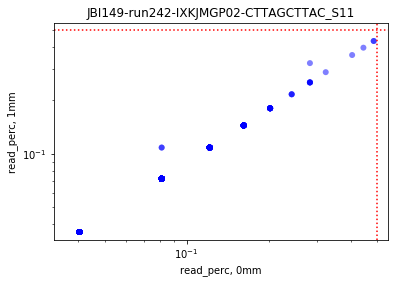

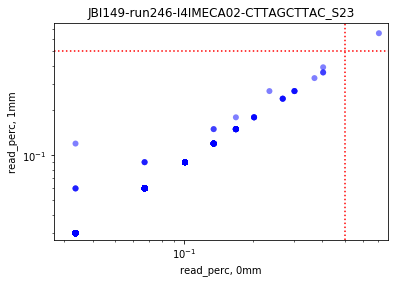

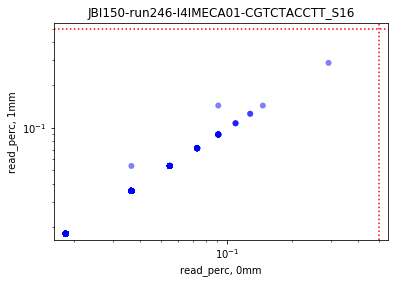

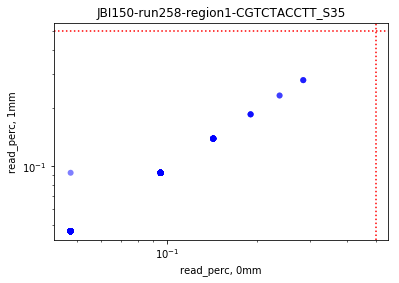

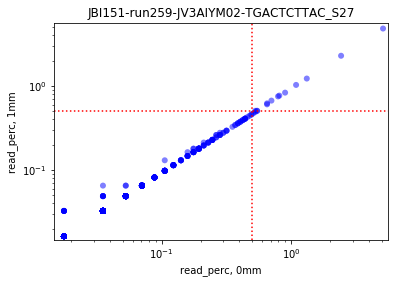

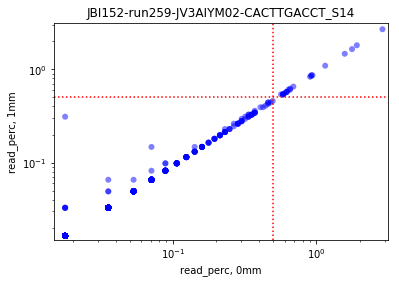

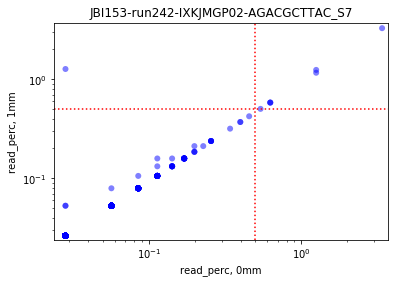

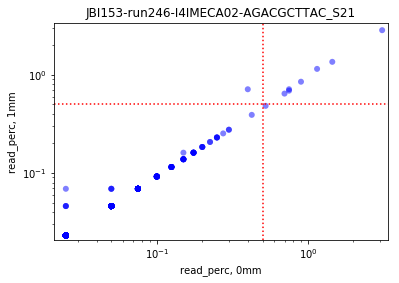

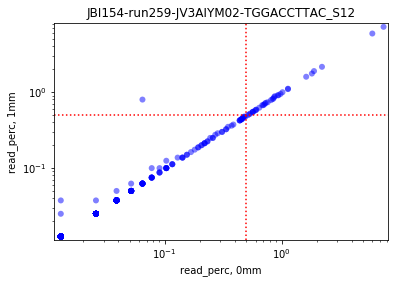

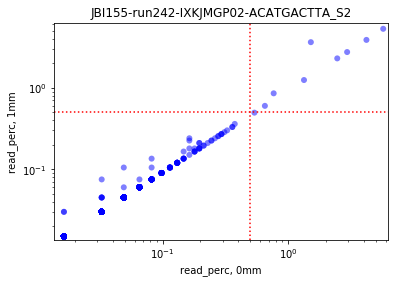

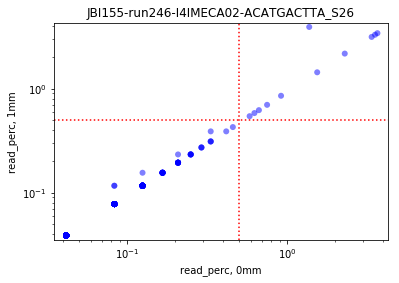

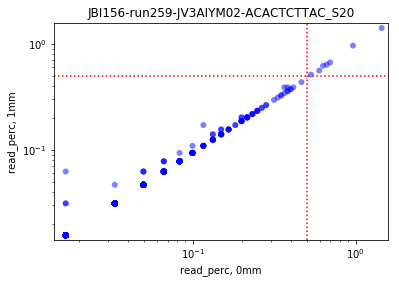

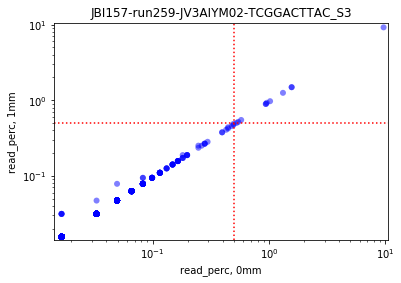

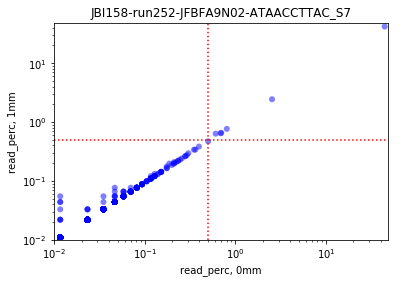

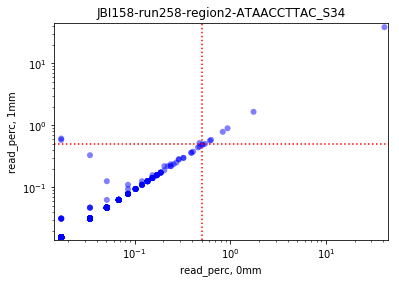

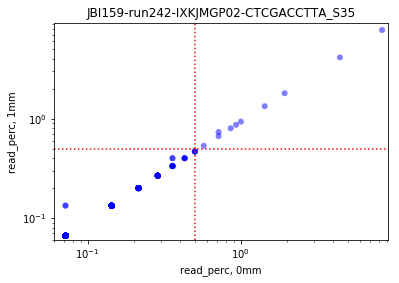

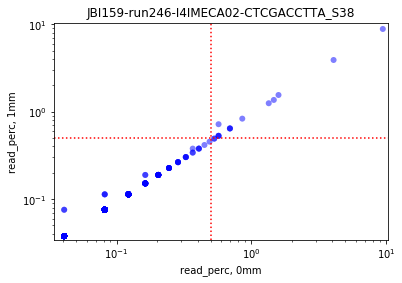

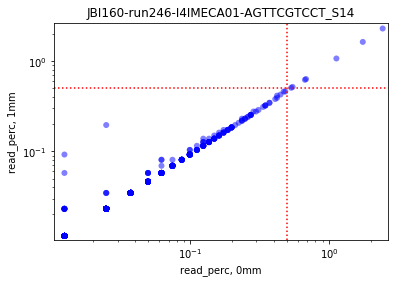

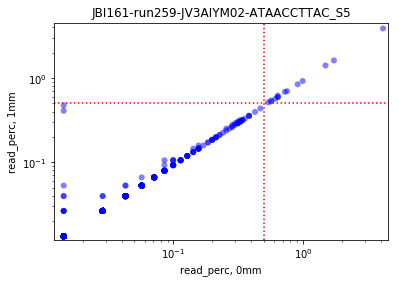

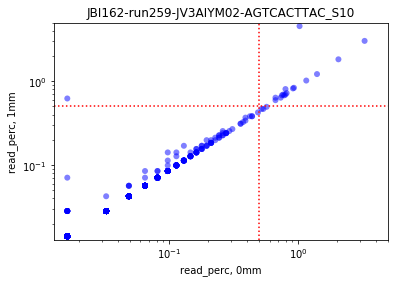

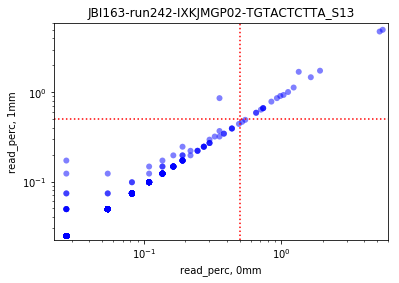

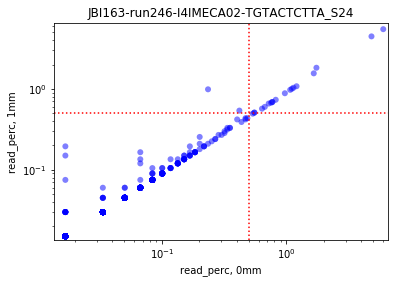

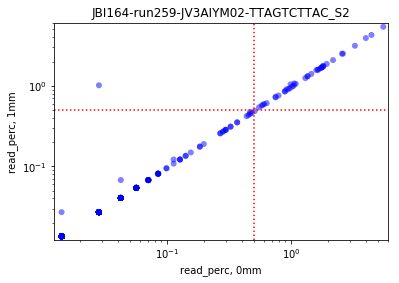

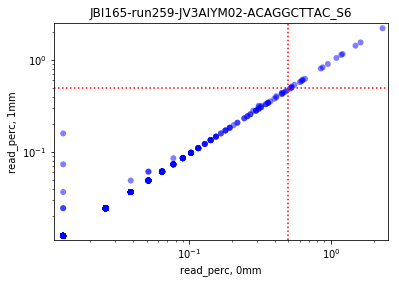

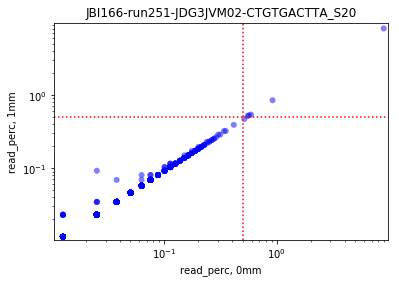

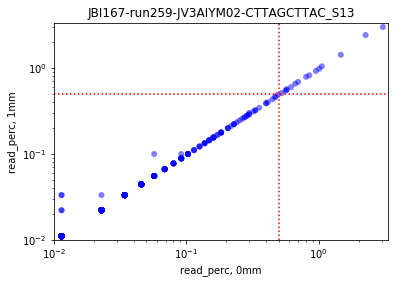

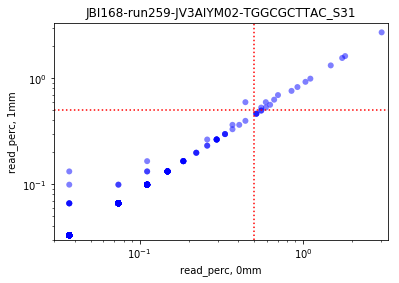

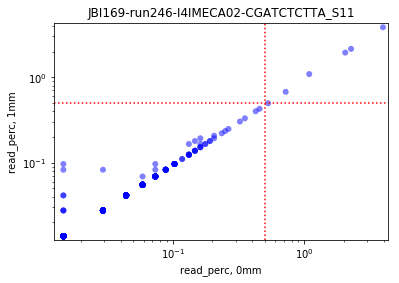

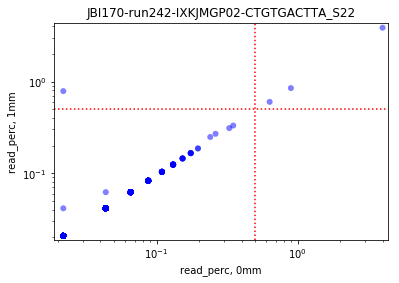

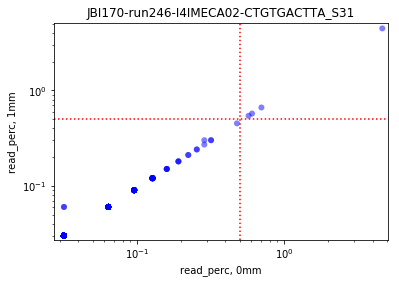

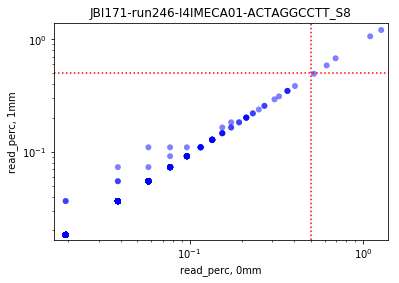

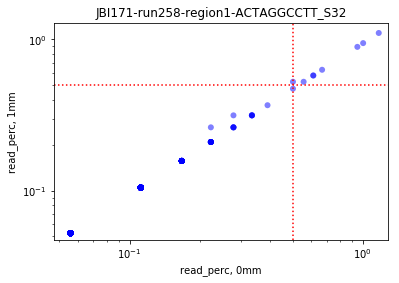

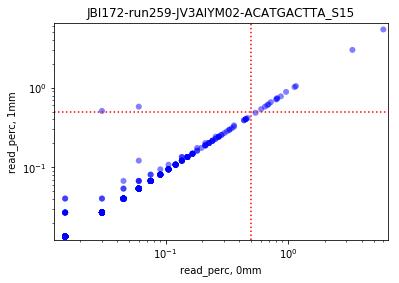

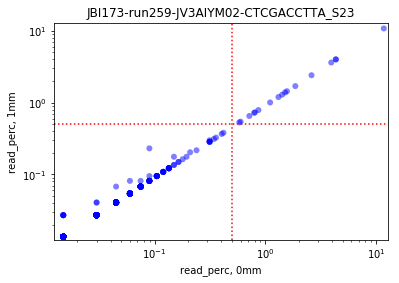

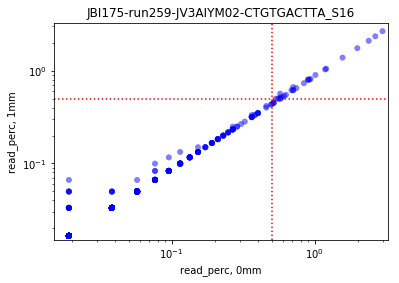

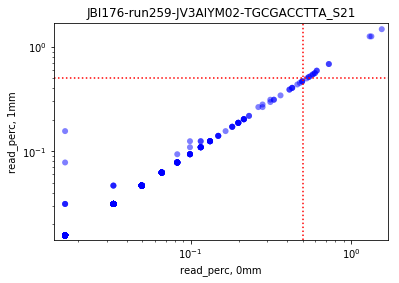

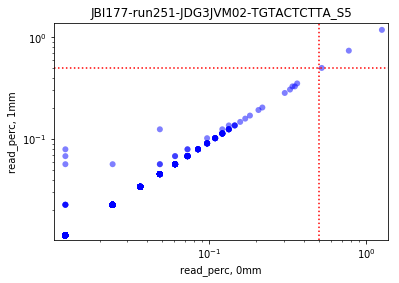

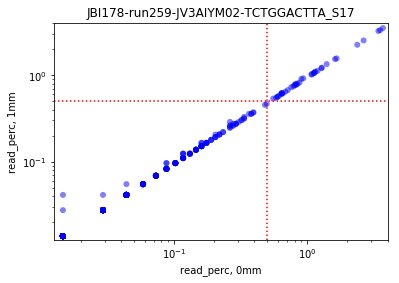

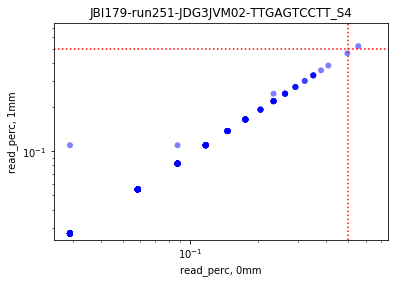

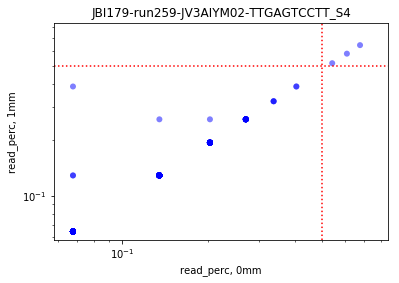

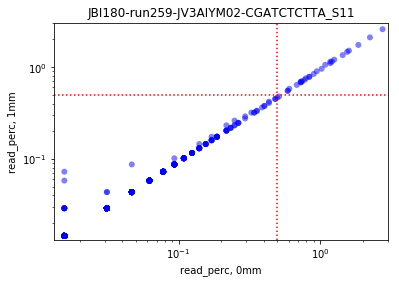

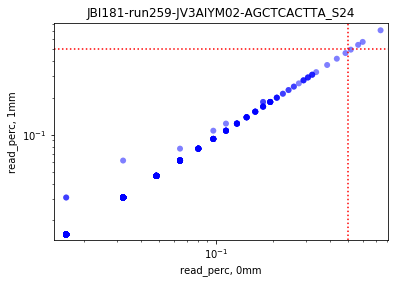

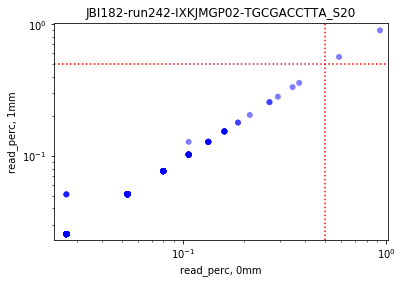

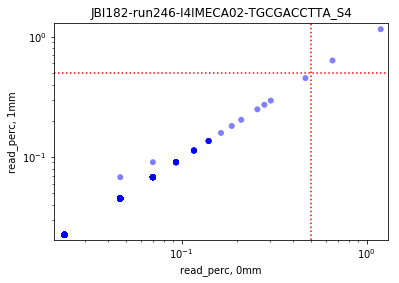

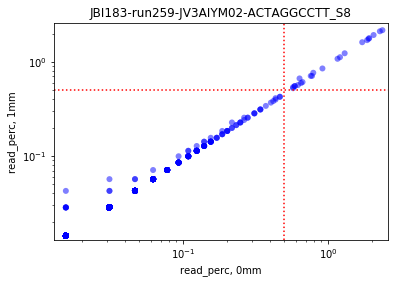

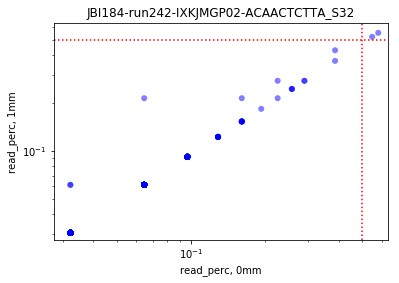

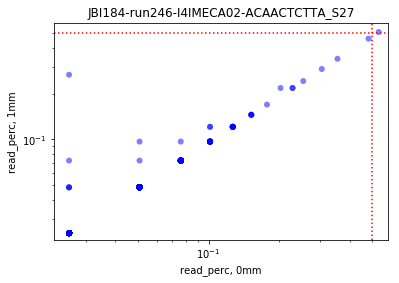

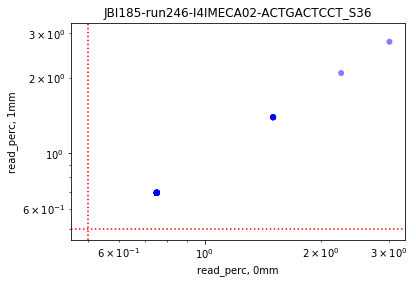

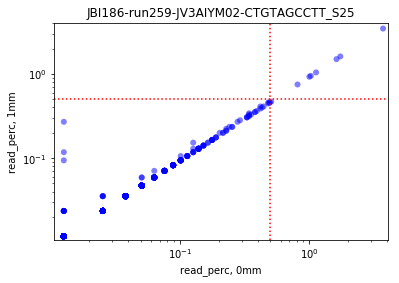

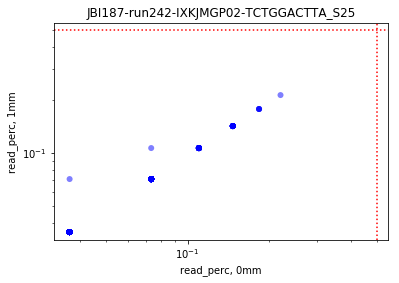

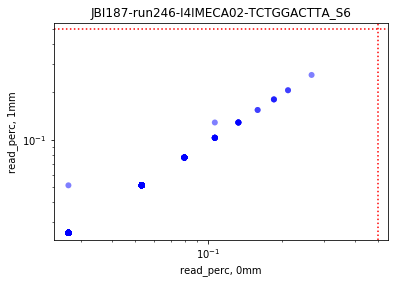

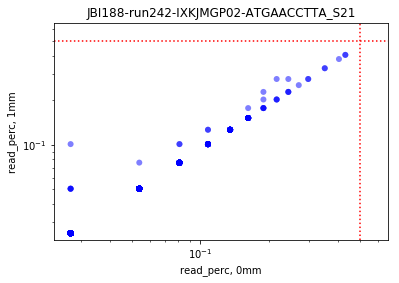

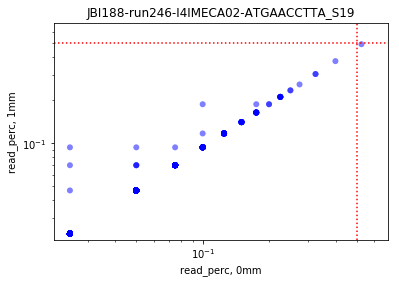

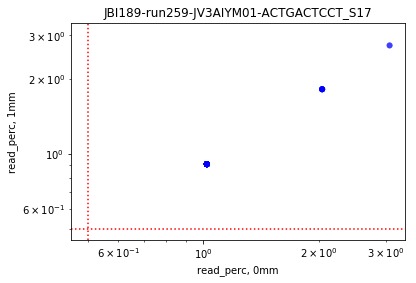

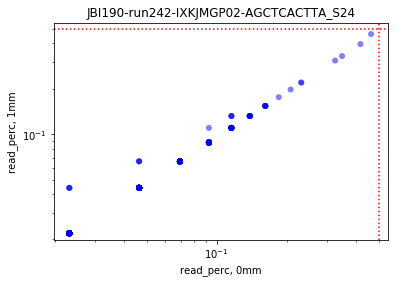

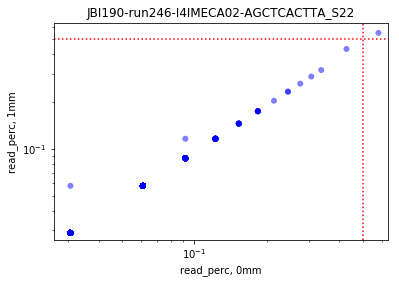

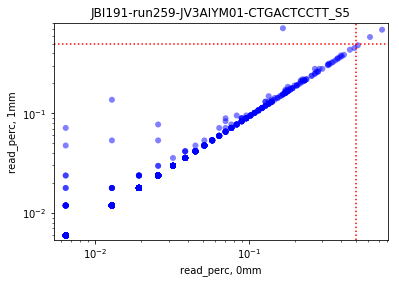

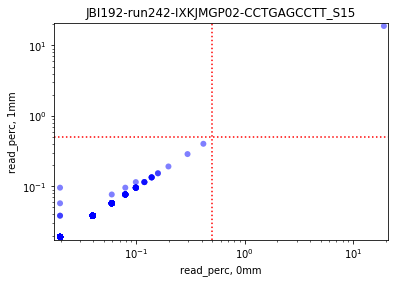

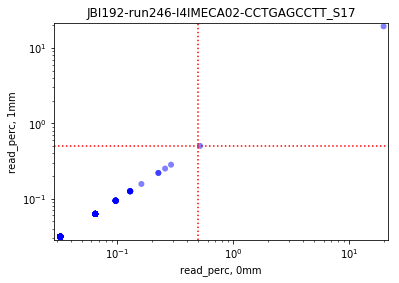

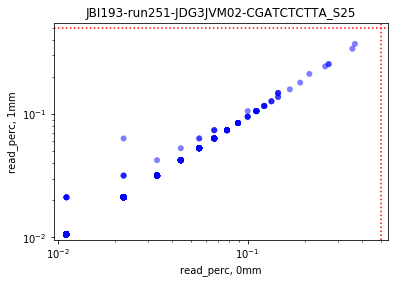

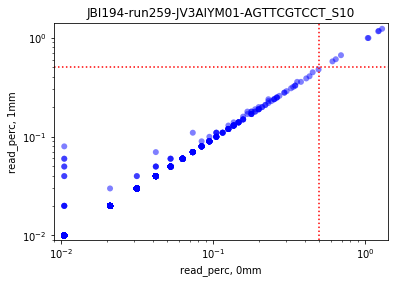

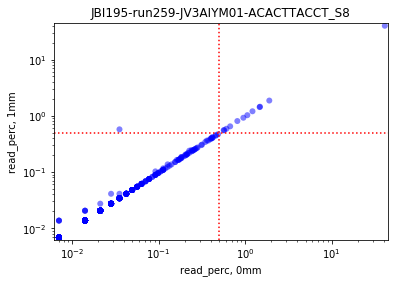

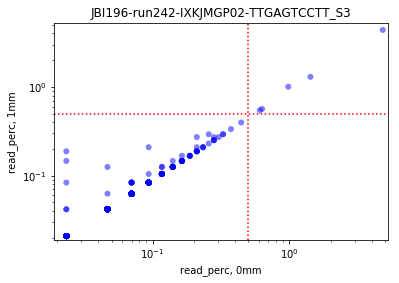

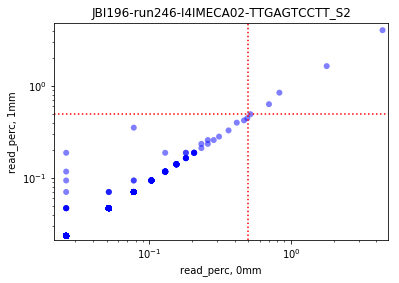

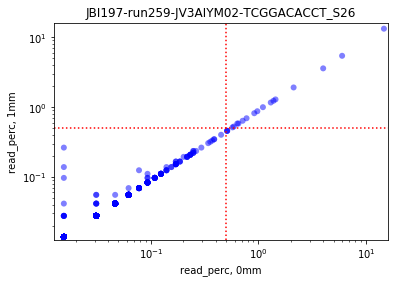

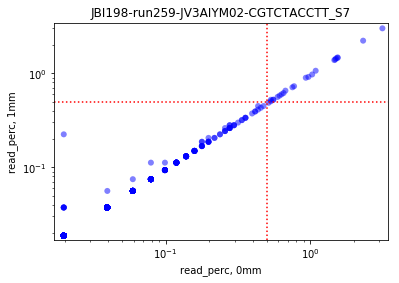

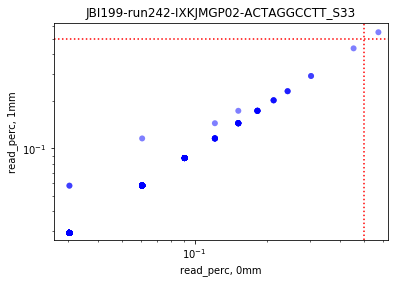

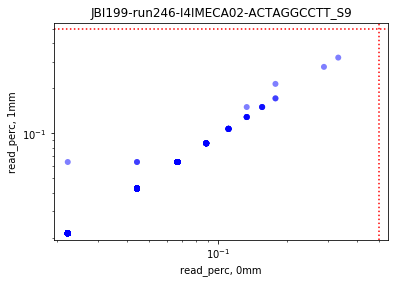

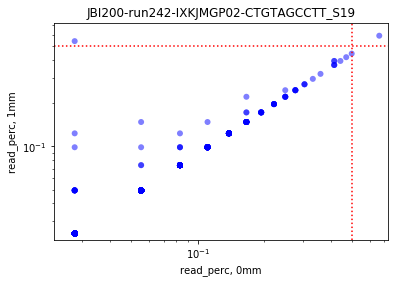

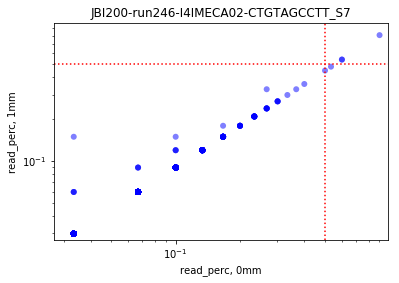

In [8]:
for s in samples:
    df_x = df_0mm[df_0mm["Sample"] == s]
    df_y = df_1mm[df_1mm["Sample"] == s]
    df_xy = pd.merge(df_x, df_y, how="outer", left_on=['V_sub', 'J_sub', 'cdr3pep'], right_on=['V_sub', 'J_sub', 'cdr3pep'])
    df_xy['read_perc_x'].fillna(0.5/sum(df_xy['freq_x']))
    df_xy['read_perc_y'].fillna(0.5/sum(df_xy['freq_y']))
    makeScatter(df_xy['read_perc_x'], df_xy['read_perc_y'], s)

## Count number of HECs / dominant clones

In [9]:
hec_threshold = 0.5
df_0mm_hecs = df_0mm[df_0mm['read_perc'] > hec_threshold]
df_0mm_nr_hecs = df_0mm_hecs.groupby('Sample').agg({'Analysis': len})
df_1mm_hecs = df_1mm[df_1mm['read_perc'] > hec_threshold]
df_1mm_nr_hecs = df_1mm_hecs.groupby('Sample').agg({'Analysis': len})
df_nr_hecs = pd.merge(df_0mm_nr_hecs, df_1mm_nr_hecs, how='outer', left_index=True, right_index=True)
df_nr_hecs = df_nr_hecs.reset_index()
df_nr_hecs["Difference"] = df_nr_hecs["Analysis_y"] - df_nr_hecs["Analysis_x"]

df_nr_hecs

Sample  Analysis_x  Analysis_y  \
0    JBI001-run252-JFBFA9N02-CGTCTCTTAC_S12         8.0        10.0   
1      JBI001-run258-region2-CGTCTCTTAC_S18        11.0        11.0   
2    JBI001-run259-JV3AIYM01-CGTCTCTTAC_S29        14.0        15.0   
3     JBI003-run242-IXKJMGP01-CTGACCTTAC_S7         1.0         1.0   
4    JBI003-run246-I4IMECA01-CTGACCTTAC_S23         1.0         1.0   
5    JBI004-run242-IXKJMGP01-TGACTCTTAC_S31         9.0        11.0   
6    JBI004-run246-I4IMECA01-TGACTCTTAC_S34         6.0         7.0   
7    JBI005-run252-JFBFA9N02-CCGAGCTTAC_S13         9.0         9.0   
8      JBI005-run258-region2-CCGAGCTTAC_S30        12.0        13.0   
9    JBI005-run259-JV3AIYM01-CCGAGCTTAC_S18        21.0        17.0   
10    JBI008-run252-JFBFA9N02-TTAGTCTTAC_S3         3.0         3.0   
11   JBI009-run251-JDG3JVM02-TCTGGACTTA_S10         5.0         5.0   
12   JBI010-run252-JFBFA9N02-ACAGGCTTAC_S16         3.0         3.0   
13     JBI010-run258-region2-ACAGGCTTAC_S32         2.0         3.0   
14   JBI011-run246-I4IMECA01-TCGGACACCT_S17        15.0        19.0   
15   JBI012-run252-JFBFA9N02-CTTAGCTTAC_S18         3.0         5.0   
16     JBI012-run258-region2-CTTAGCTTAC_S27         2.0         2.0   
17   JBI013-run246-I4IMECA01-CGATCTCTTA_S26         1.0         1.0   
18   JBI014-run252-JFBFA9N02-TGGCGCTTAC_S23         2.0         1.0   
19     JBI014-run258-region2-TGGCGCTTAC_S33         1.0         1.0   
20   JBI014-run259-JV3AIYM01-TGGCGCTTAC_S30        22.0        24.0   
21   JBI015-run242-IXKJMGP01-CTTGACTTAC_S26         6.0        12.0   
22   JBI015-run246-I4IMECA01-CTTGACTTAC_S29         4.0         8.0   
23   JBI016-run242-IXKJMGP01-TGGACCTTAC_S19         2.0         2.0   
24    JBI017-run252-JFBFA9N02-AGACGCTTAC_S2         6.0         5.0   
25      JBI017-run258-region1-AGACGCTTAC_S6         6.0         6.0   
26   JBI018-run246-I4IMECA02-AGTTCGTCCT_S12        13.0        13.0   
27   JBI019-run252-JFBFA9N02-ACATGACTTA_S11         1.0         1.0   
28     JBI019-run258-region1-ACATGACTTA_S10         1.0         1.0   
29   JBI019-run259-JV3AIYM01-ACATGACTTA_S22         7.0         7.0   
..                                      ...         ...         ...   
236  JBI176-run259-JV3AIYM02-TGCGACCTTA_S21        15.0        15.0   
237   JBI177-run251-JDG3JVM02-TGTACTCTTA_S5         3.0         2.0   
238  JBI178-run259-JV3AIYM02-TCTGGACTTA_S17        41.0        42.0   
239   JBI179-run251-JDG3JVM02-TTGAGTCCTT_S4         1.0         2.0   
240   JBI179-run259-JV3AIYM02-TTGAGTCCTT_S4         3.0         4.0   
241  JBI180-run259-JV3AIYM02-CGATCTCTTA_S11        27.0        28.0   
242  JBI181-run259-JV3AIYM02-AGCTCACTTA_S24         5.0         4.0   
243  JBI182-run242-IXKJMGP02-TGCGACCTTA_S20         2.0         2.0   
244   JBI182-run246-I4IMECA02-TGCGACCTTA_S4         2.0         2.0   
245   JBI183-run259-JV3AIYM02-ACTAGGCCTT_S8        23.0        24.0   
246  JBI184-run242-IXKJMGP02-ACAACTCTTA_S32         2.0         2.0   
247  JBI184-run246-I4IMECA02-ACAACTCTTA_S27         1.0         1.0   
248  JBI185-run246-I4IMECA02-ACTGACTCCT_S36       120.0       130.0   
249  JBI186-run259-JV3AIYM02-CTGTAGCCTT_S25         8.0         7.0   
250  JBI188-run242-IXKJMGP02-ATGAACCTTA_S21         NaN         1.0   
251  JBI188-run246-I4IMECA02-ATGAACCTTA_S19         1.0         1.0   
252  JBI189-run259-JV3AIYM01-ACTGACTCCT_S17        86.0        98.0   
253  JBI190-run246-I4IMECA02-AGCTCACTTA_S22         1.0         1.0   
254   JBI191-run259-JV3AIYM01-CTGACTCCTT_S5         3.0         4.0   
255  JBI192-run242-IXKJMGP02-CCTGAGCCTT_S15         1.0         1.0   
256  JBI192-run246-I4IMECA02-CCTGAGCCTT_S17         2.0         2.0   
257  JBI194-run259-JV3AIYM01-AGTTCGTCCT_S10         8.0         8.0   
258   JBI195-run259-JV3AIYM01-ACACTTACCT_S8        12.0        13.0   
259   JBI196-run242-IXKJMGP02-TTGAGTCCTT_S3         5.0         5.0   
260   JBI196-run246-I4IMECA02-TTGAGTCCTT_S2         5.0      

/home/barbera/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


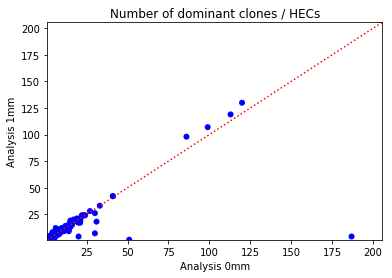

In [10]:
the_minimum = min(min(df_nr_hecs['Analysis_x']), min(df_nr_hecs['Analysis_y'])) * 0.9
the_maximum = max(max(df_nr_hecs['Analysis_x']), max(df_nr_hecs['Analysis_y'])) * 1.1
fig = plt.figure()
ax = plt.gca()
ax.scatter(df_nr_hecs['Analysis_x'], df_nr_hecs['Analysis_y'], c='blue', edgecolors='none')
ax.set_xlim([the_minimum, the_maximum])
ax.set_ylim([the_minimum, the_maximum])
ax.set_xlabel("Analysis 0mm")
ax.set_ylabel("Analysis 1mm")
ax.plot([the_minimum, the_maximum], [the_minimum, the_maximum], c='r', linestyle=":")
plt.title('Number of dominant clones / HECs')
fig.show()

In [11]:
outfile = "runJBI-0mm-1mm-hecs.csv"
df_nr_hecs.to_csv(outfile)
print("Wrote", outfile, "to disk")

Wrote runJBI-0mm-1mm-hecs.csv to disk
